In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import copy

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/Users/rtaujale/opt/anaconda3/envs/prn/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Clusters               0   1  2
CategIntensity_504.3  22  14  3
CategIntensity_524.3  26  14  5
CategIntensity_542.5  35  18  3
CategIntensity_546.3  22  15  3
CategIntensity_666.5  20  14  4
CategIntensity_688.4  19  10  5
CategIntensity_703.6  25  16  3
CategIntensity_725.6  21  11  3
CategIntensity_725.7  20  11  2
CategIntensity_732.6  19  12  3
CategIntensity_749.5  20  21  4
CategIntensity_754.5  19  15  4
CategIntensity_754.6  19  11  3
CategIntensity_755.5  24  11  2
CategIntensity_758.6  17  15  4
CategIntensity_760.6  19  14  2
CategIntensity_762.6  19  13  2
CategIntensity_780.5  20  14  3
CategIntensity_780.6  20  12  3
CategIntensity_781.6  20  12  2
CategIntensity_782.5  19  12  2
CategIntensity_787.6  19  11  4
CategIntensity_789.6  19  14  7
CategIntensity_798.5  20  13  2
CategIntensity_798.6  20  13  1
CategIntensity_804.6  19  11  3
CategIntensity_806.6  20  11  3
CategIntensity_808.6  19  12  2
CategIntensity_810.7  18  13  2
CategIntensity_826.6  17  13  4
CategIntensity_832.6  21  15  3
CategIntensity_833.6  18  13  3
CategIntensity_834.6  28  13  3

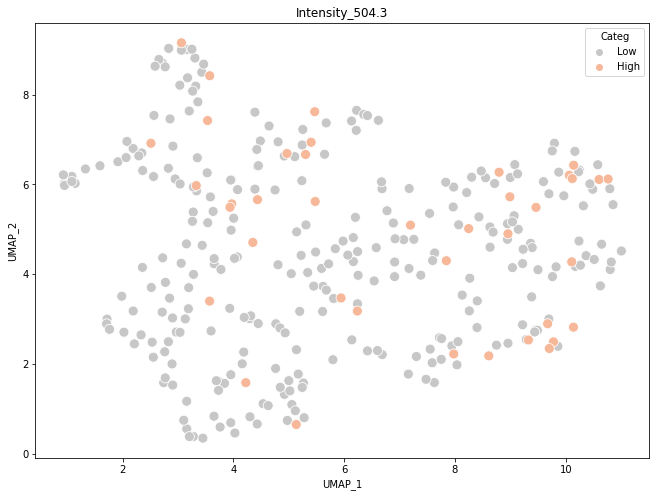

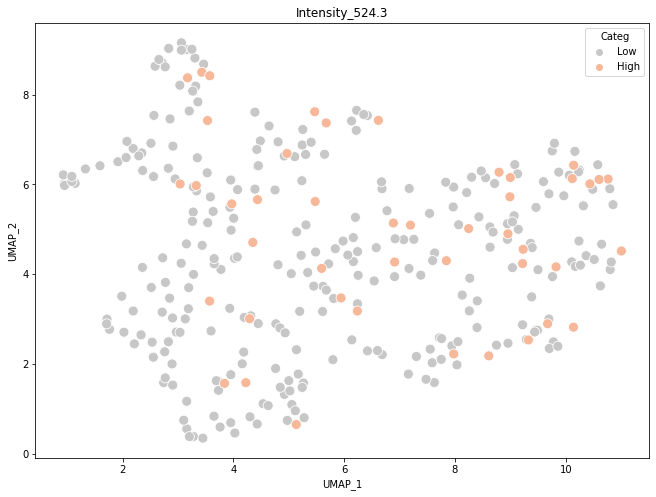

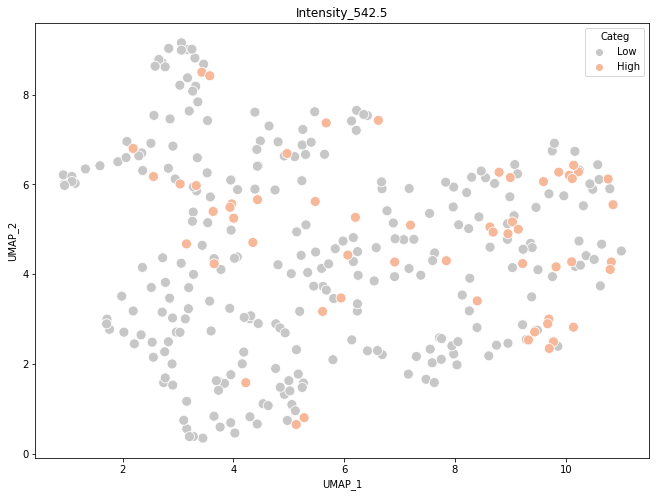

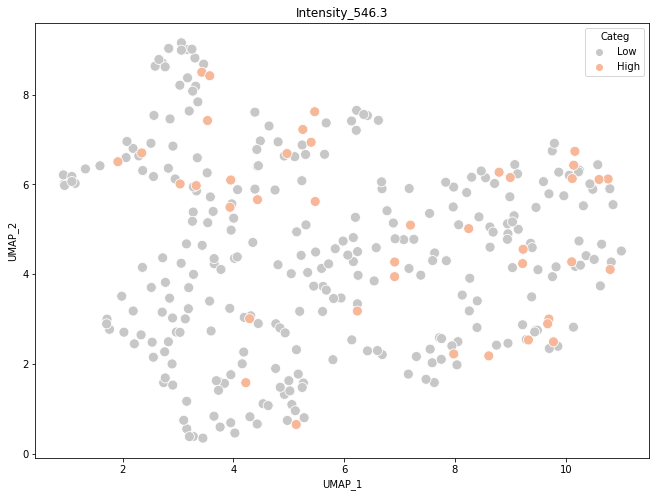

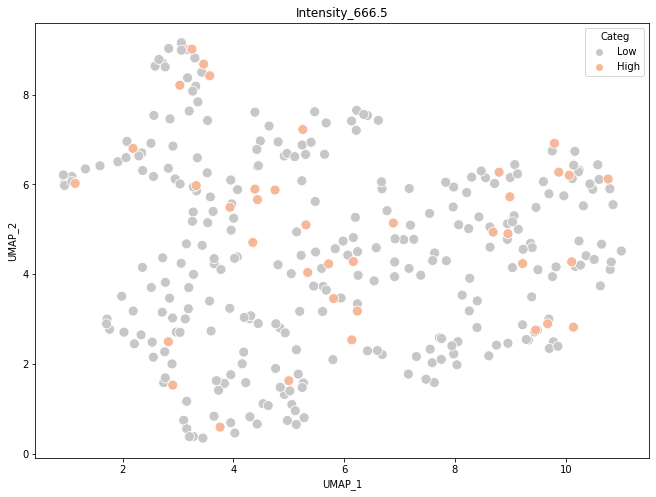

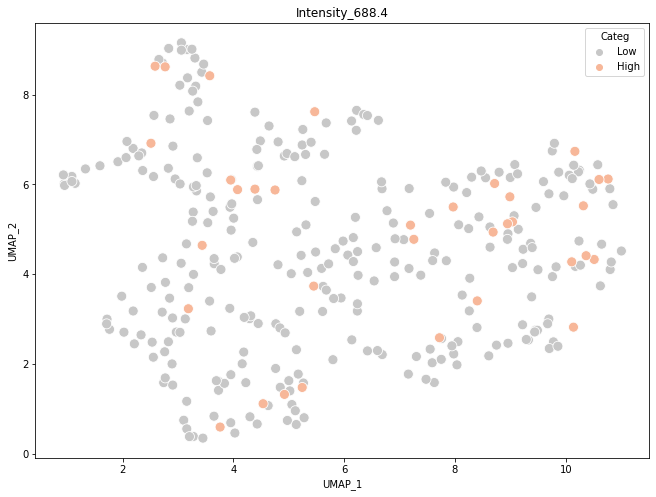

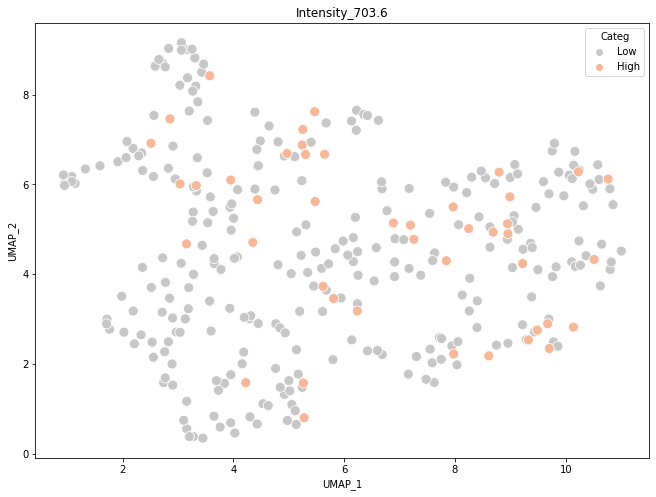

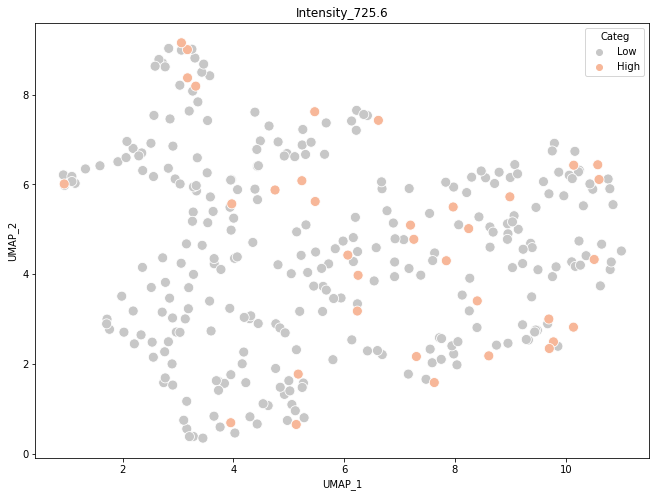

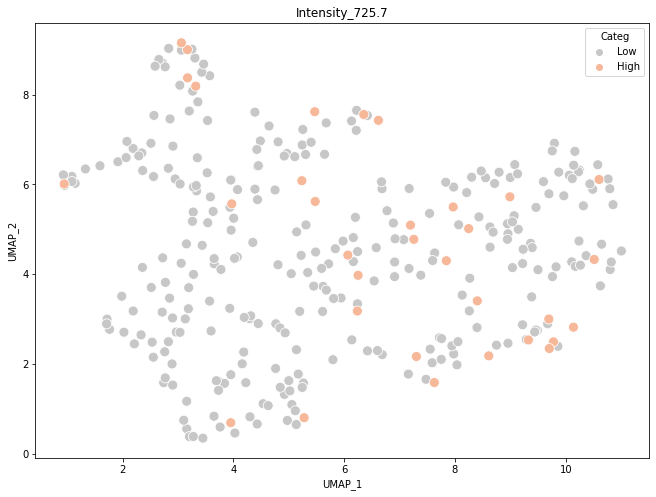

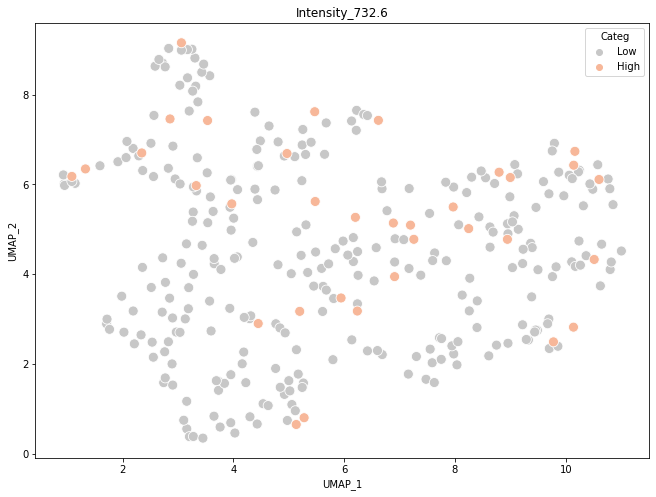

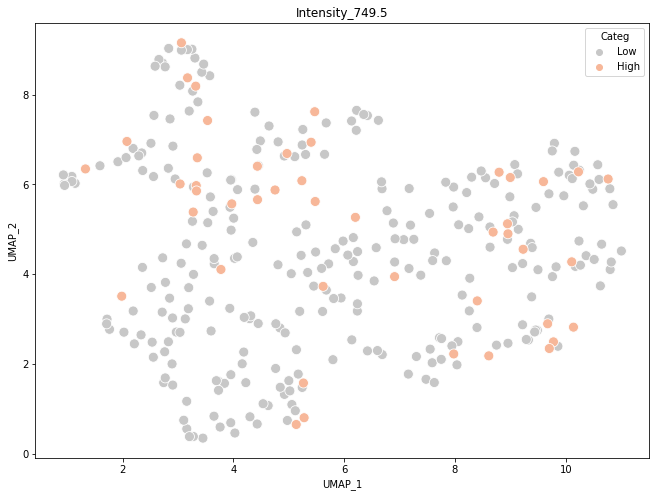

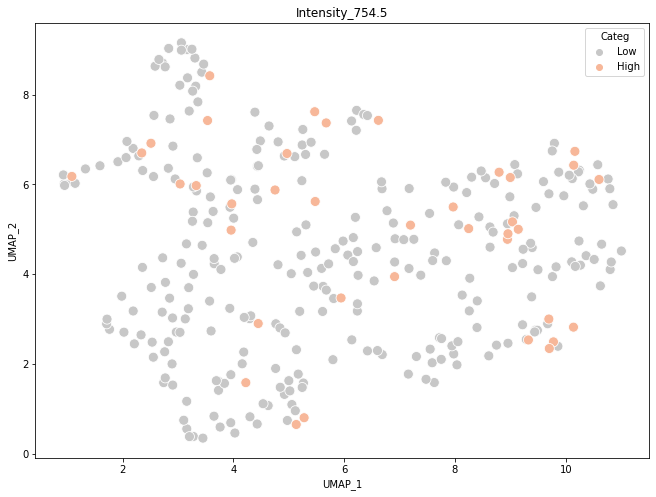

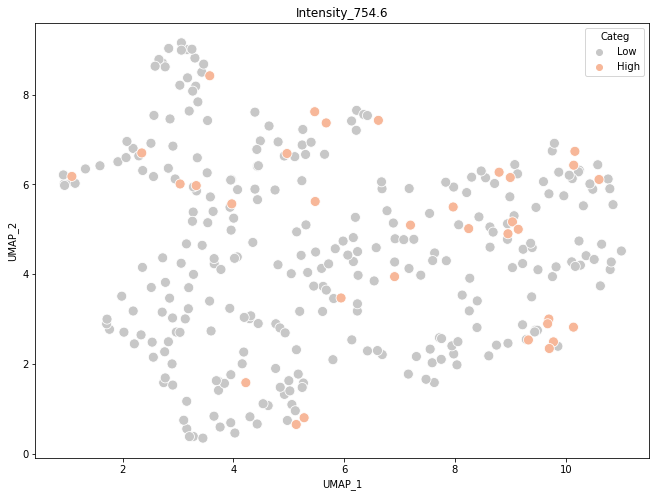

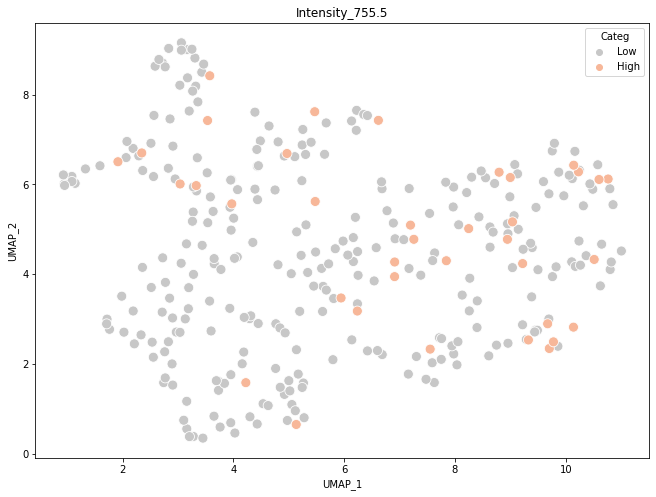

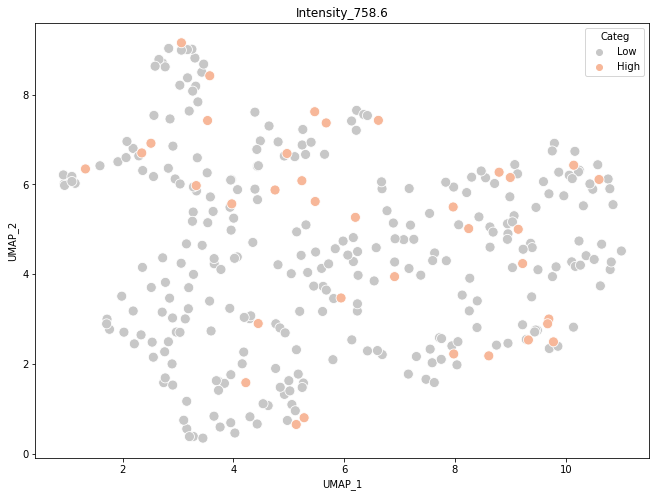

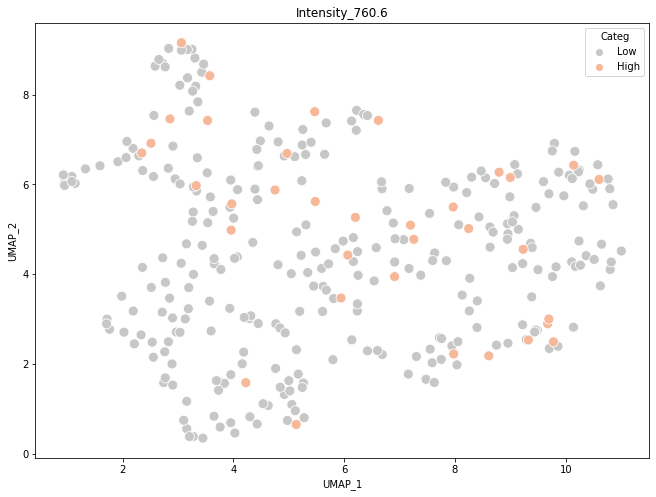

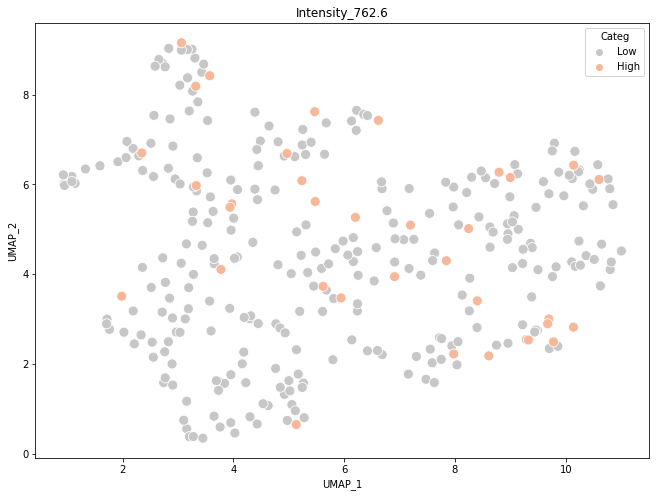

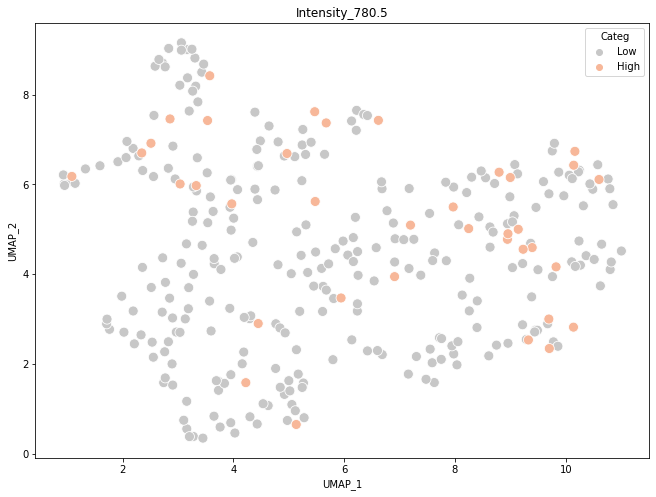

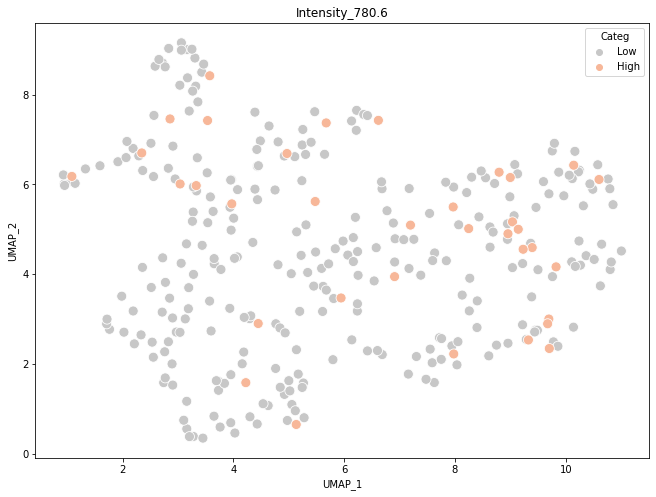

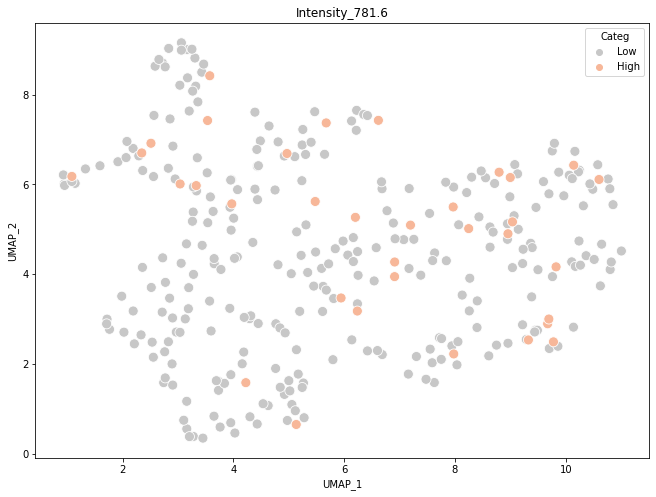

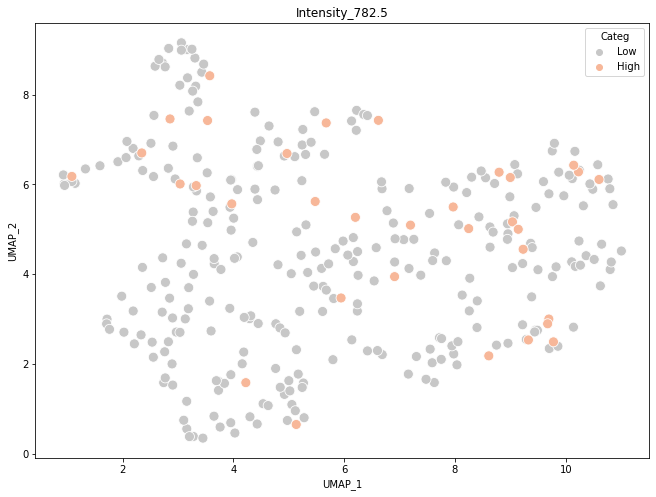

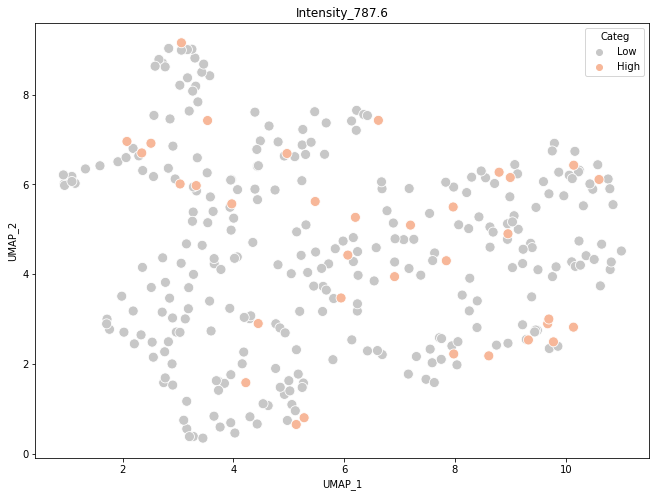

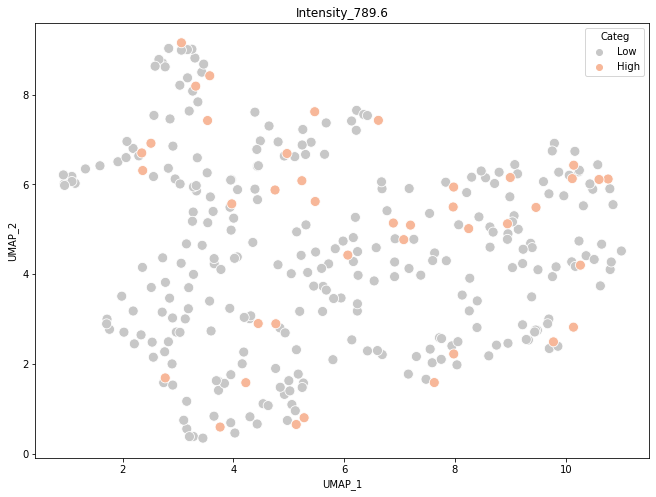

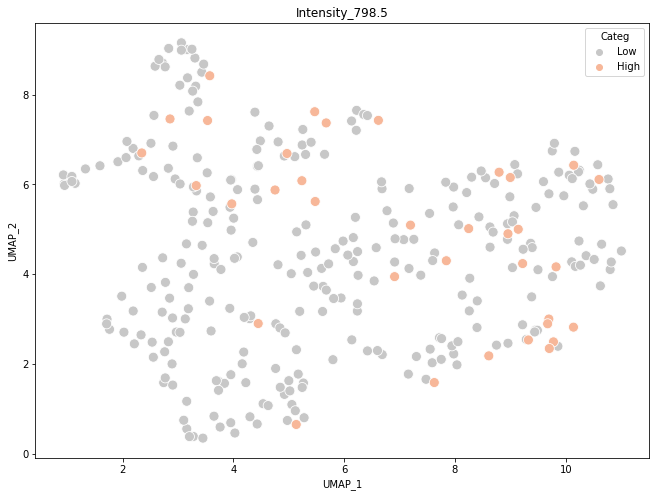

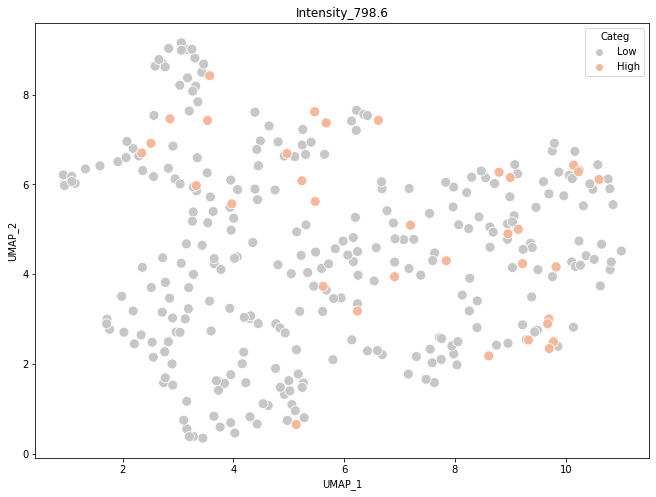

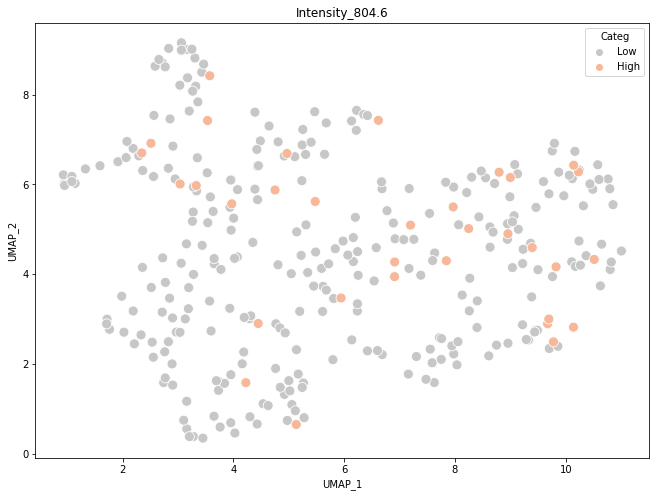

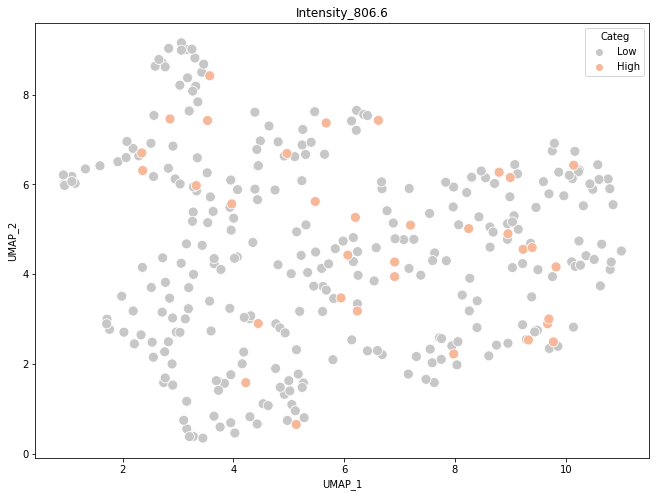

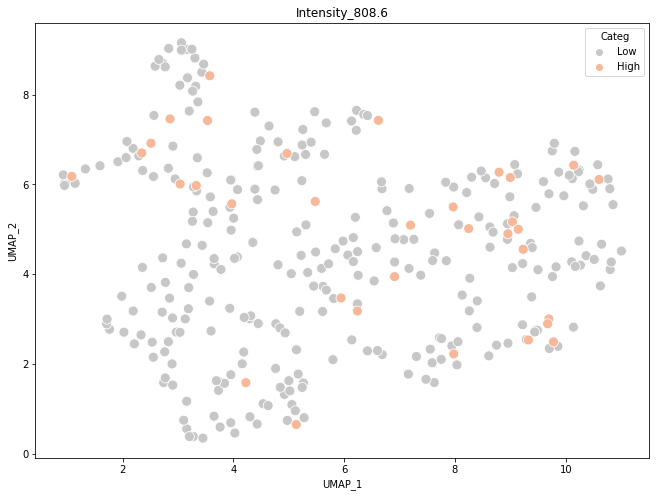

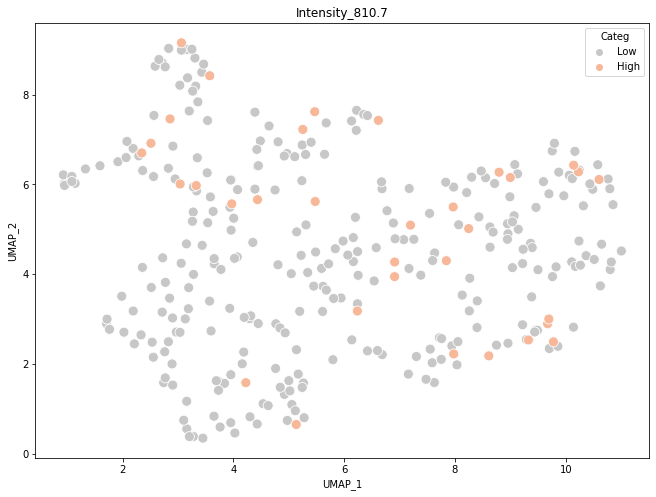

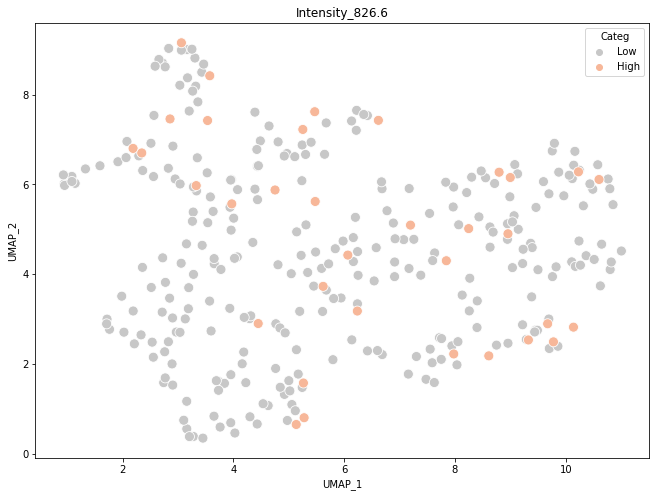

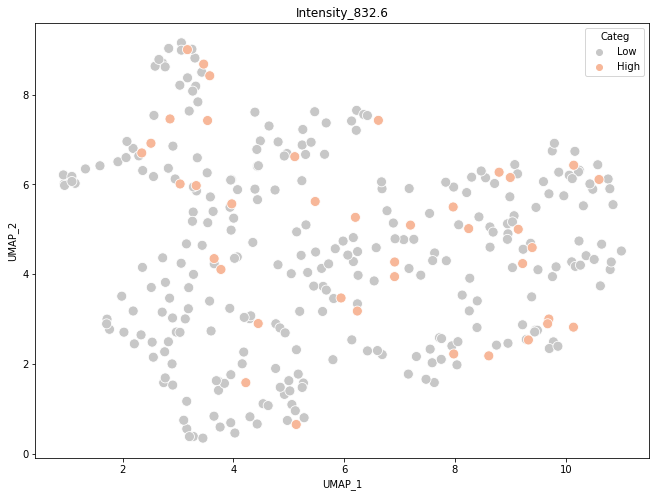

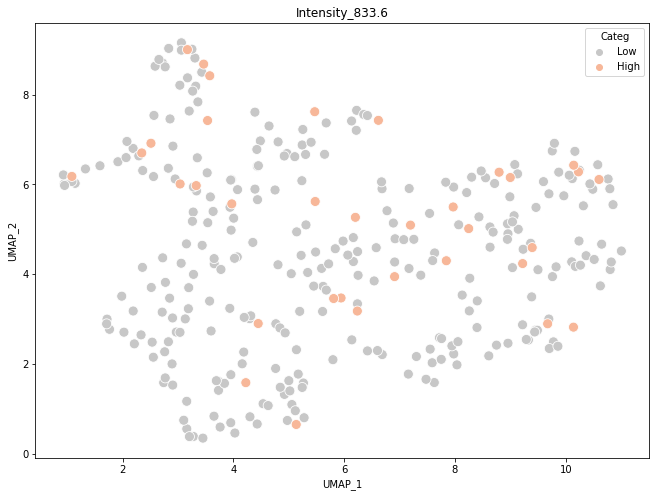

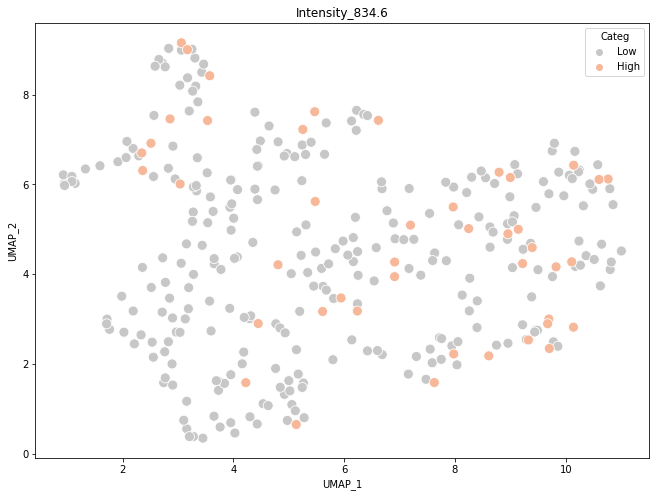

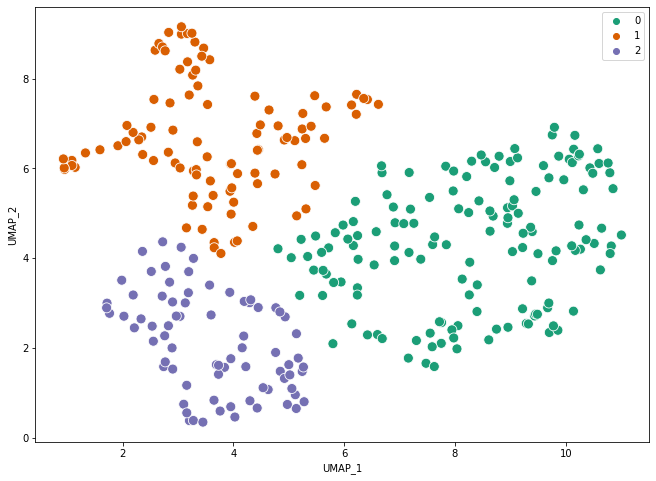

In [2]:
def get_ranges2(df, col):
    PCmax=df[col].max()
    PCmin=df[col].min()
    crit_val=df[col].quantile([0.90]).values
    categ=list()
    for v in df[col].to_list():
        if v<crit_val:
            categ.append("Low")
        else:
            categ.append("High")
    if 'Categ' in df:
        df['Categ']=categ
    else:        
        df.insert(0,'Categ',categ)
    return(df)

# df=pd.read_excel("/Users/priya/OneDrive - University of Georgia/shared/maldi_paper_singleCell/UMAP data/ifng_ctrl_UMAP_allrows.xlsx")
df=pd.read_excel("/Users/rtaujale/OneDrive-UGA/Prnka_Rahil_shared_UGA/maldi_paper_singleCell/UMAP data/IFN_for_UMAP.xlsx")
# df=pd.read_excel("/Users/priya/OneDrive - University of Georgia/shared/maldi_paper_singleCell/UMAP data/ifng_ctrl_UMAP_allrows - Copy.xlsx")
df1=df.drop(columns=['Groups','PC1','PC2', 'PC3', 'PC4', 'Location_Center_X', 'Location_Center_Y'])#[df['Groups']=='s1w2']
df1=df[df['Groups']=='IFNγ'].drop(columns=['Groups', 'PC1','PC2', 'PC3', 'PC4', 'Location_Center_X', 'Location_Center_Y'])
df1_norm = (df1-df1.min())/(df1.max()-df1.min())
df1_norm_extended=copy.deepcopy(df1_norm)
lipid_cols=[col for col in df1 if col.startswith('Intensity_') and any(char.isdigit() for char in col)]
#df1_sel=df1_norm[lipid_cols] # To select only lipid columns for umap
df1_sel=df1_norm.drop(lipid_cols, axis=1) # To select only morphology columns for umap

#df1_sel=df1_norm
emb=pd.read_csv("/Users/rtaujale/OneDrive-UGA/Prnka_Rahil_shared_UGA/maldi_paper_singleCell/UMAP data/umap_embeddings.csv")
# emb=pd.read_csv("/Users/priya/OneDrive - University of Georgia/shared/maldi_paper_singleCell/UMAP data/umap_embeddings_addedfeatures.csv")
emb.columns=['UMAP_1','UMAP_2']


for i in lipid_cols:
    df1_categ=get_ranges2(df1,i)
    c_name='Categ'+str(i)
    df1_norm_extended[c_name]=df1_categ['Categ']
    df1_sel['Categ']=df1_categ['Categ']

    emb['Categ']=df1_sel['Categ']
    emb1=emb.sort_values(['Categ'], ascending=False)
#     sns_plot=
    plt.figure(figsize=(11,8))
    ax=sns.scatterplot(x=emb1['UMAP_1'],y=emb1['UMAP_2'],
                       hue=emb1['Categ'],#.iloc[:,34],
                       legend="full",
    #                    style=allData.iloc[:,0],
                       palette="RdGy_r",
                       s=100)
    ax.set(title=i)
    fname="umap_"+i+".svg"
    print(ax)
    ax.figure.savefig(fname,dpi=300)
    
model = AgglomerativeClustering(n_clusters=3)
pred_y = model.fit_predict(emb[['UMAP_1','UMAP_2']])
plt.figure(figsize=(11,8))
sns_plt = sns.scatterplot(x=emb['UMAP_1'], y=emb['UMAP_2'],hue=pred_y,palette="Dark2",s=100)

df1_norm['Clusters']=pred_y
df1_norm_extended['Clusters']=pred_y
categ_cols=[col for col in df1_norm_extended if col.startswith('CategIntensity_') and any(char.isdigit() for char in col)]

a=list()
for i in categ_cols:
    a.append(df1_norm_extended[df1_norm_extended[i]=="High"].groupby(['Clusters'])[i].count().T)
    
pd.DataFrame(a)
# Good:504.3, 780.5, 804.6
# Okay: 546.3, 732.6, 758.6
# Bad: 688.4, 749.5, 789.6


/Users/rtaujale/opt/anaconda3/envs/prn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


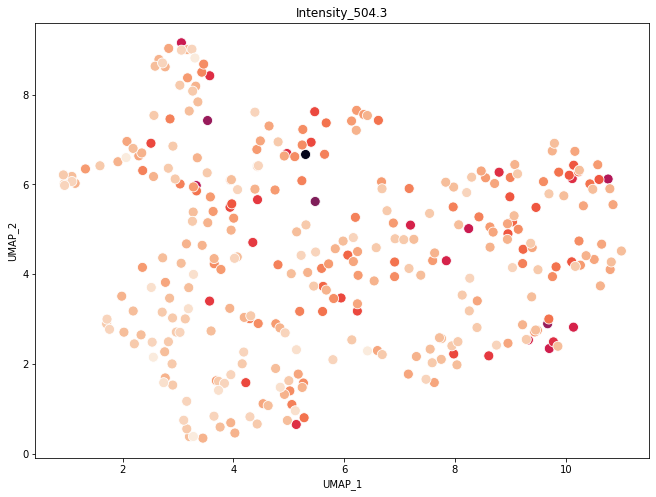

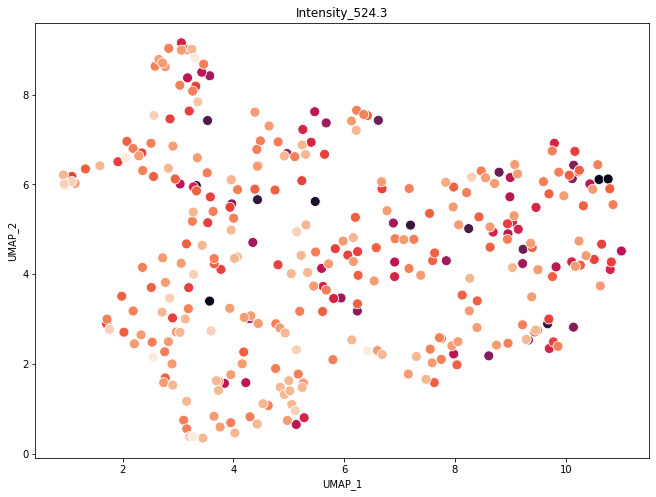

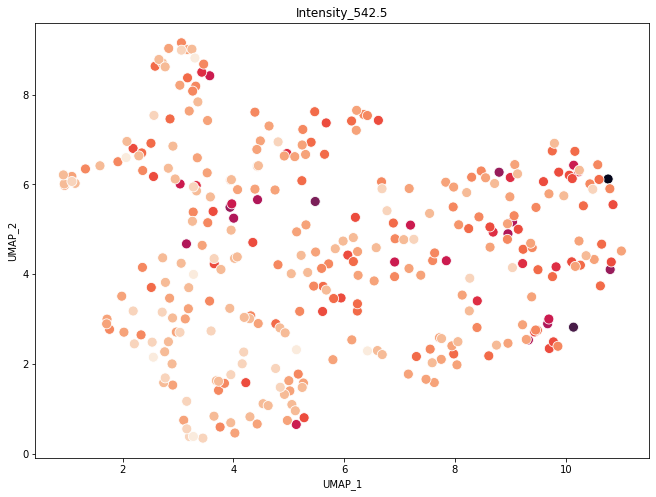

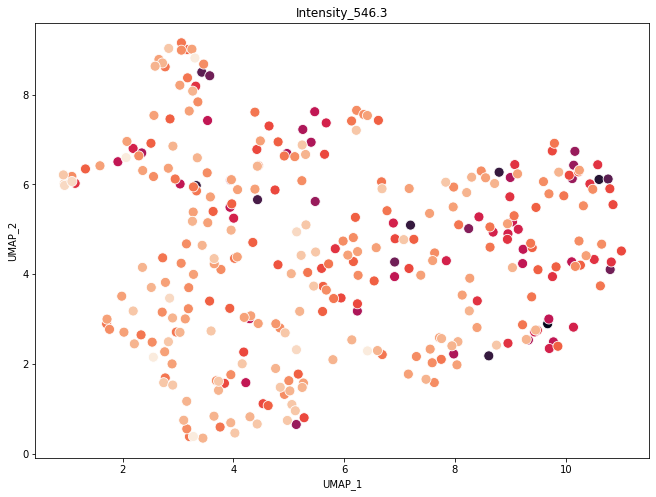

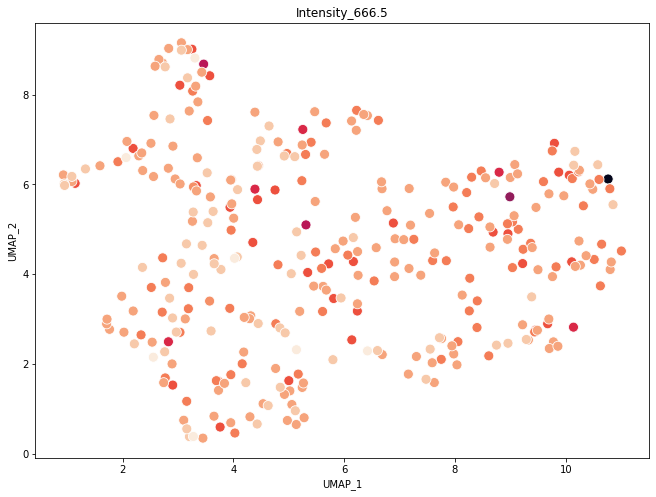

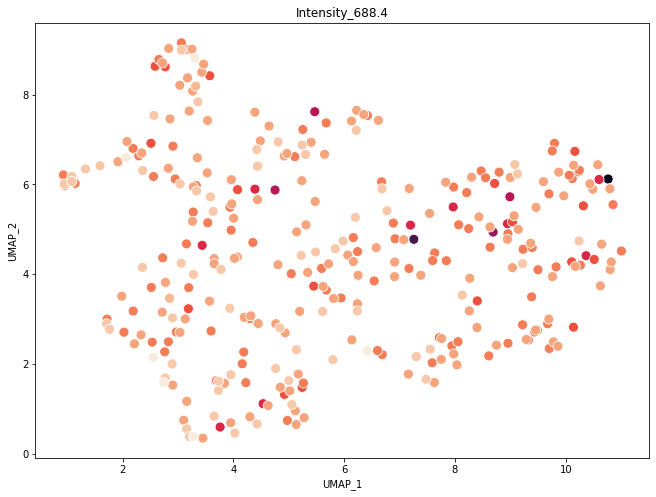

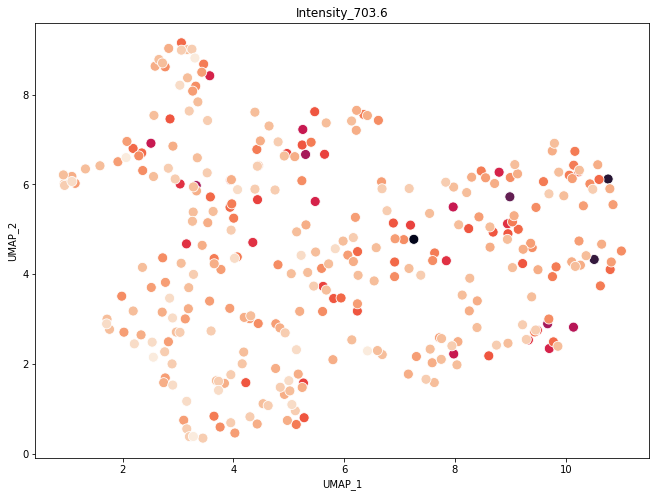

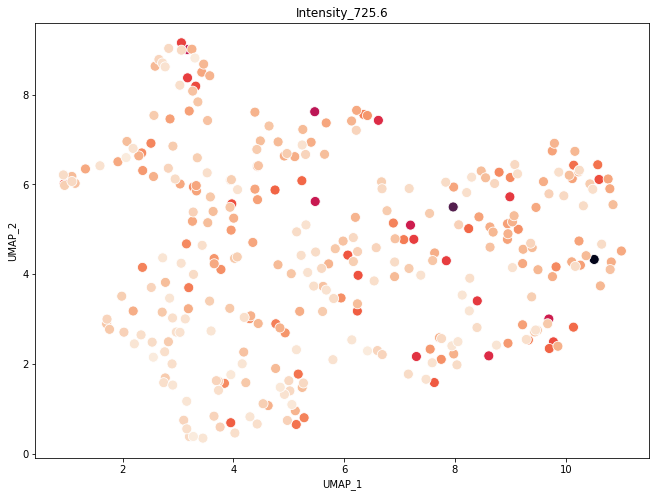

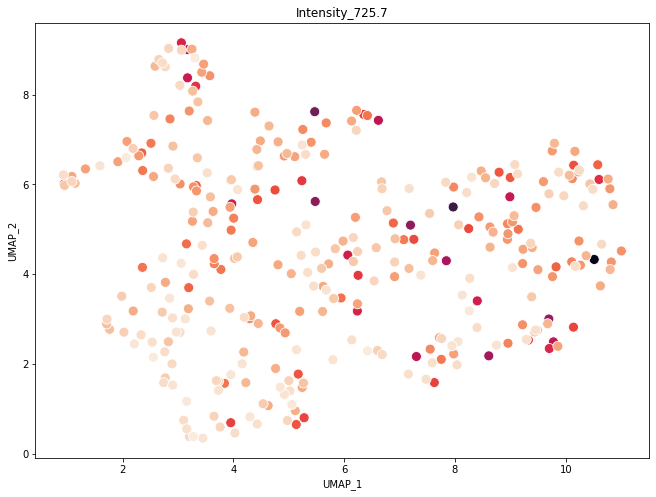

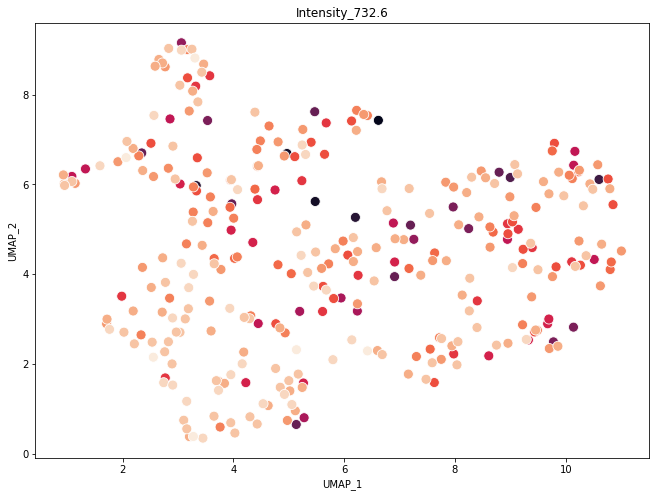

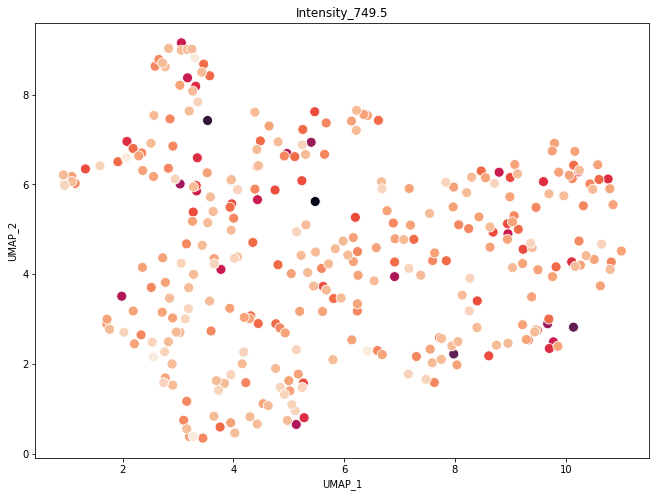

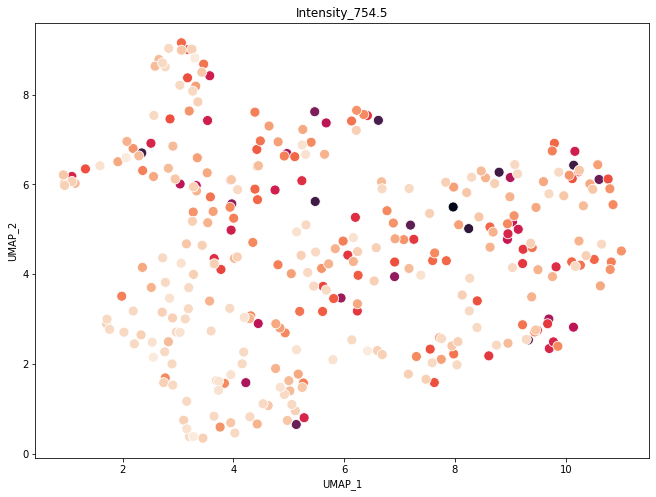

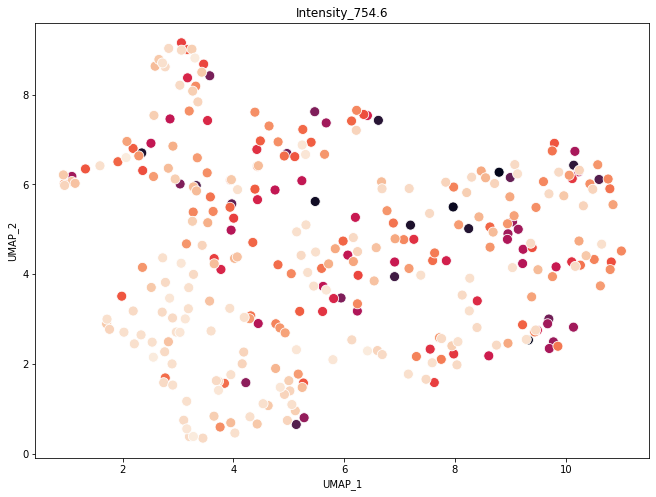

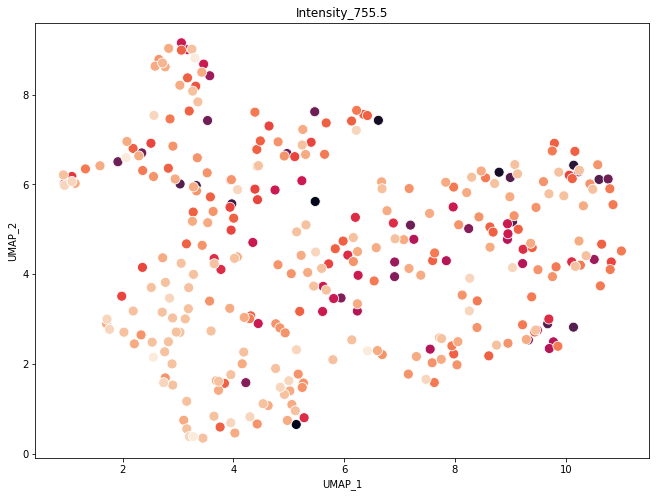

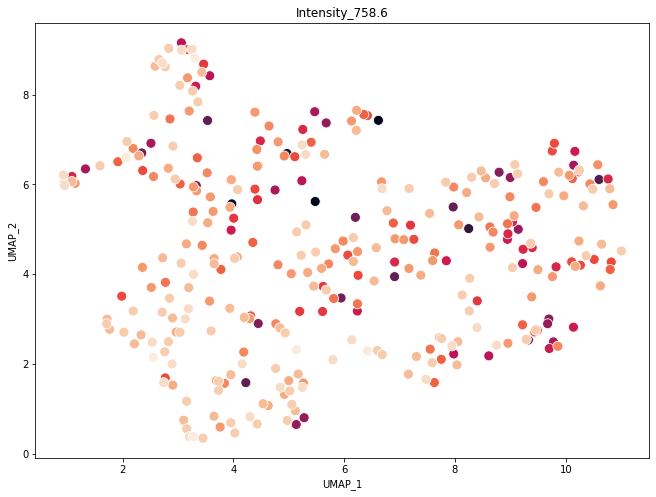

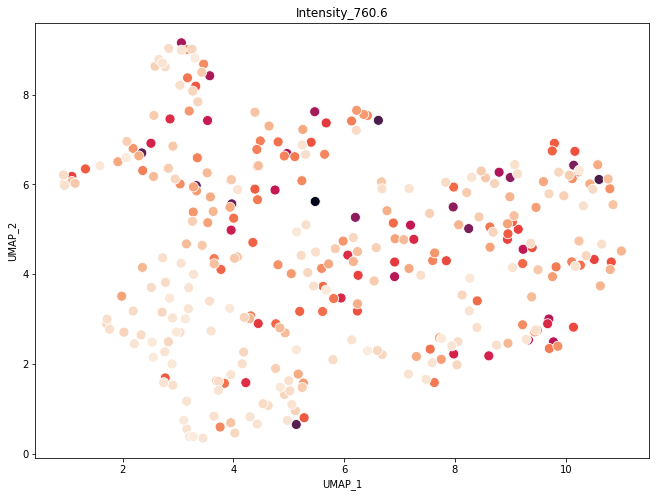

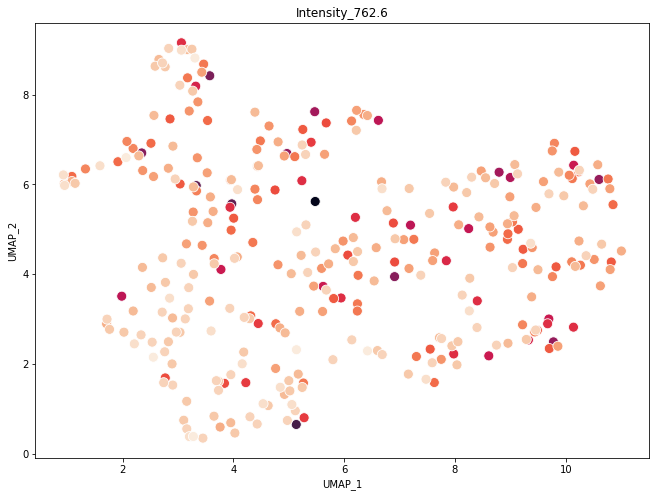

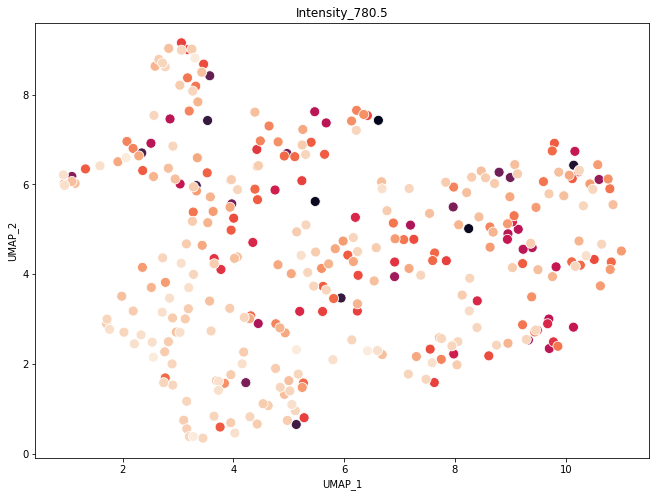

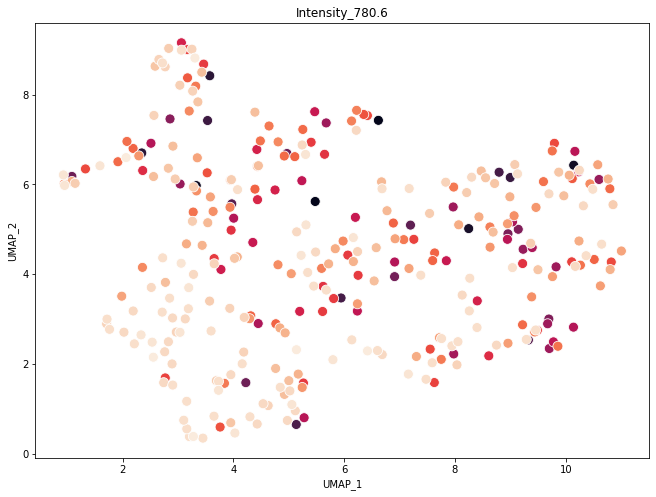

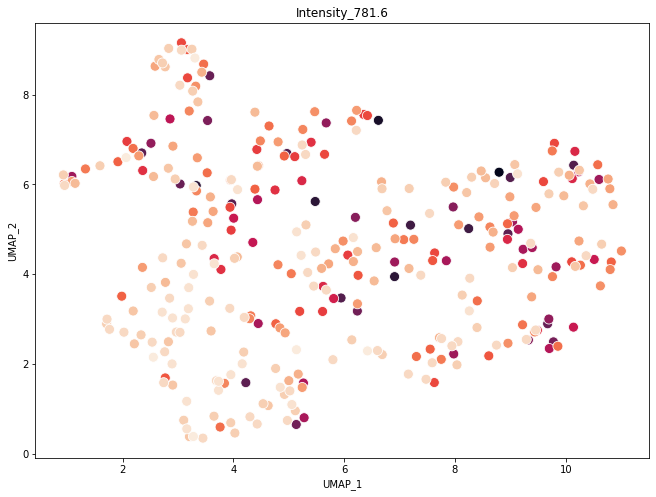

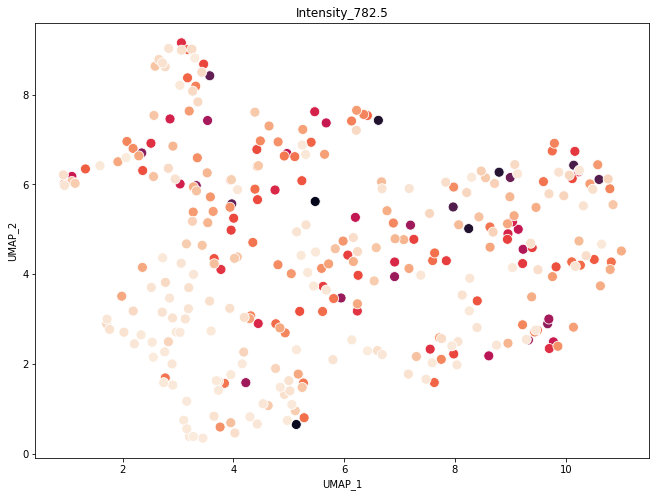

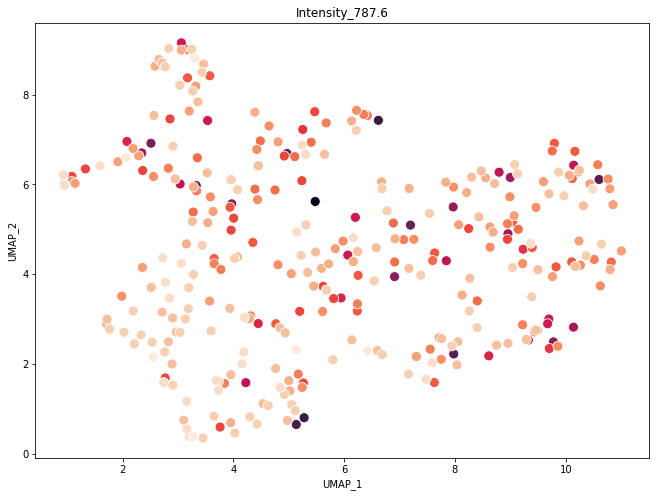

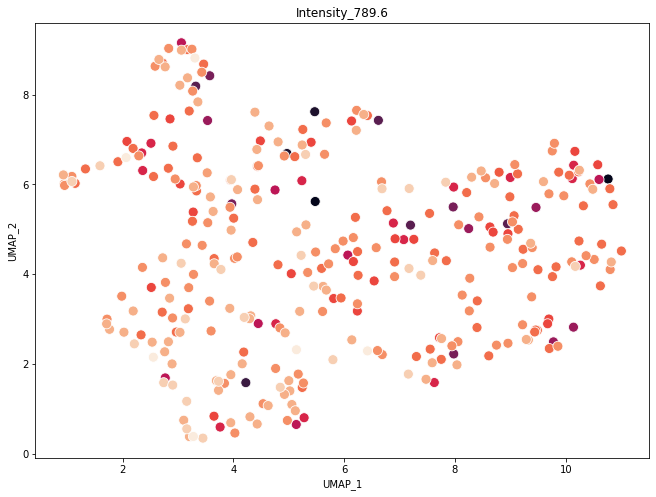

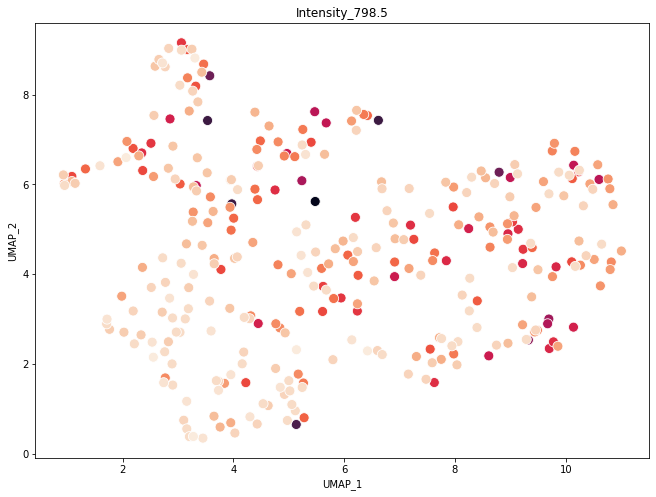

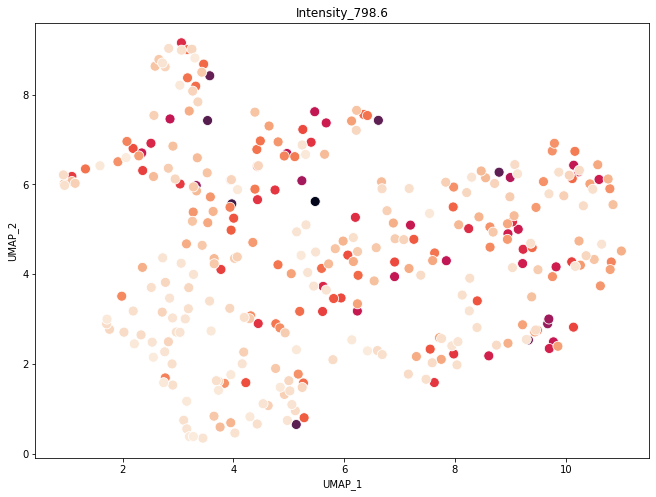

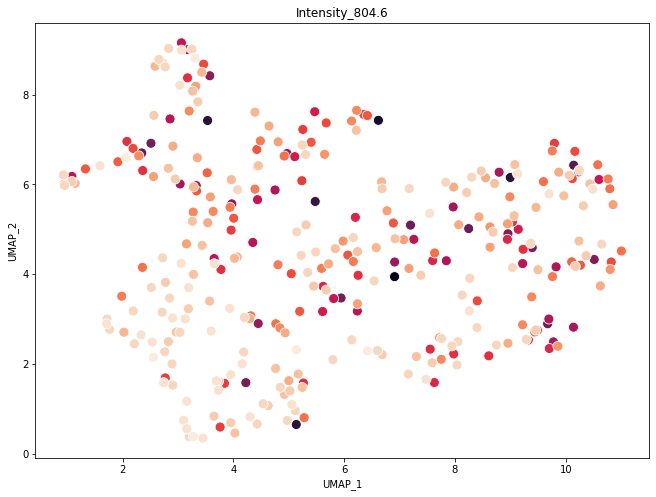

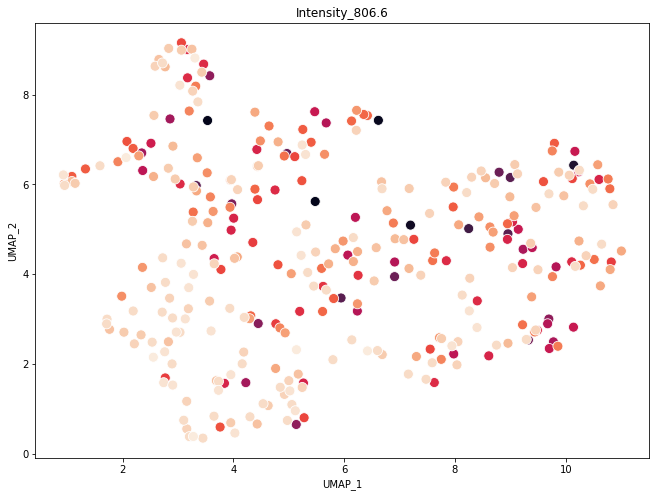

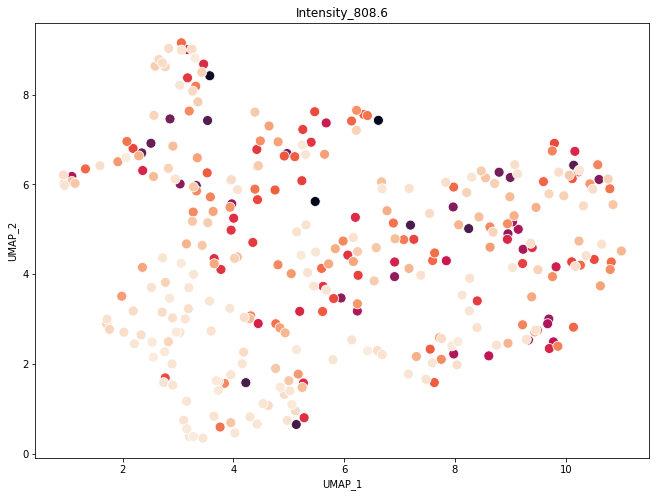

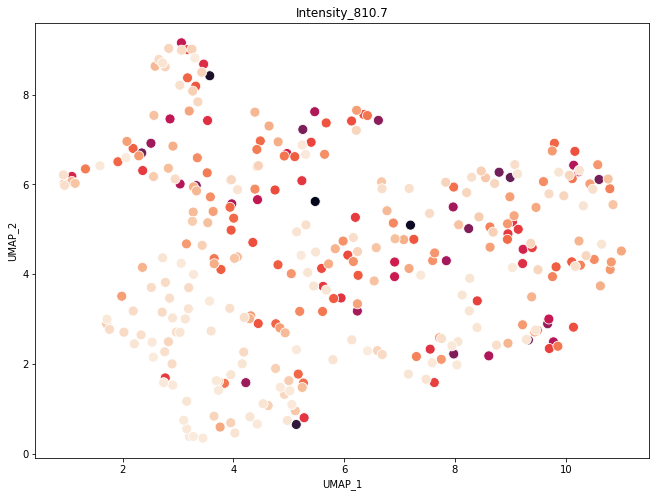

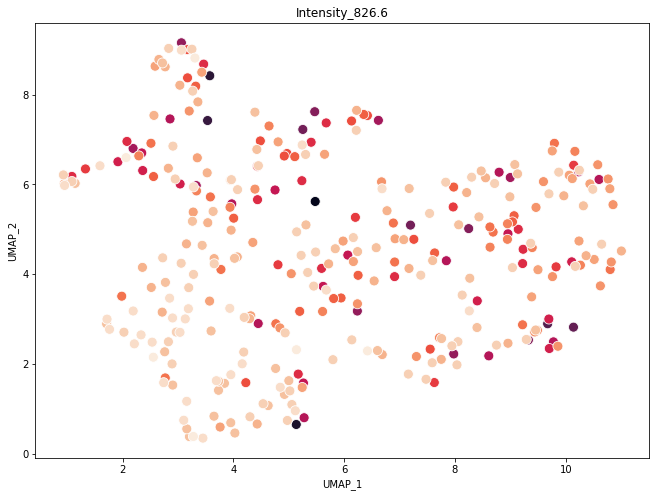

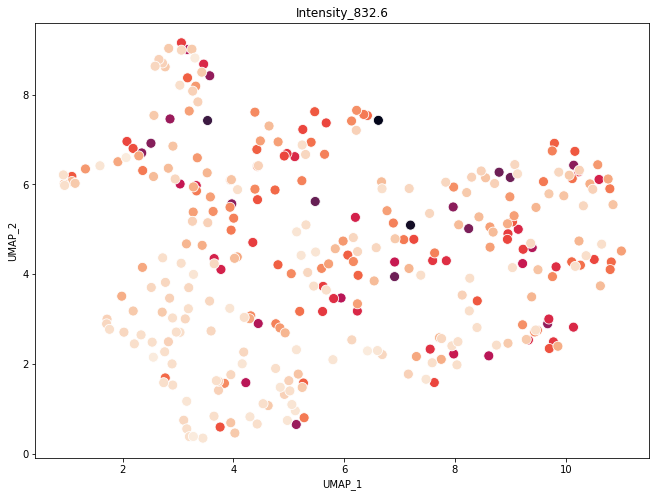

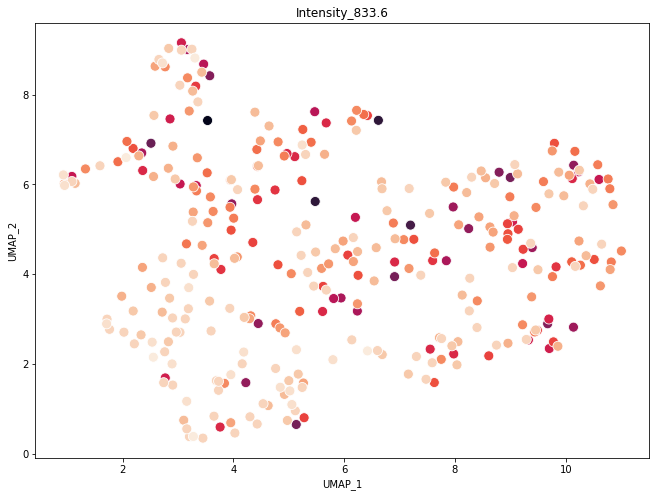

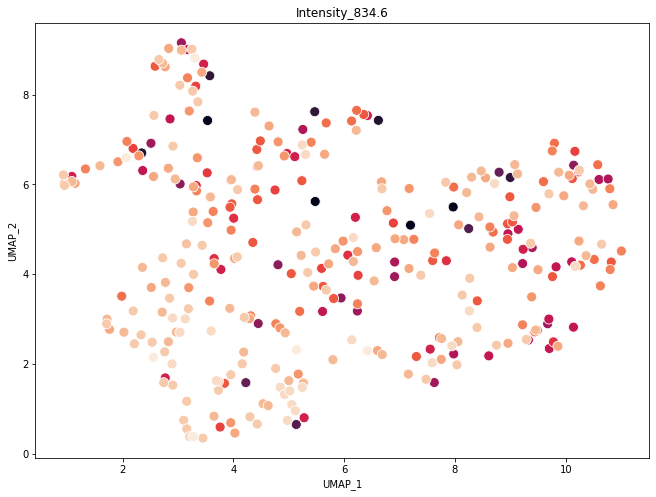

In [23]:
## For gradient coloring

for i in lipid_cols:
    emb['Categ']=df1[i] # 546.3, 758.6,  789.6
    emb1=emb.sort_values(['Categ'], ascending=False)
    #     sns_plot=
    plt.figure(figsize=(11,8))
    ax=sns.scatterplot(x=emb1['UMAP_1'],y=emb1['UMAP_2'],
                       hue=emb1['Categ'],#.iloc[:,34],
                       legend="full",
    #                    style=allData.iloc[:,0],
                       palette="rocket_r",
                       s=100)
    ax.set(title=i)
    plt.legend([],[], frameon=False)
    fname="umap_"+i+"_gradient.svg"
    ax.figure.savefig(fname,dpi=300)

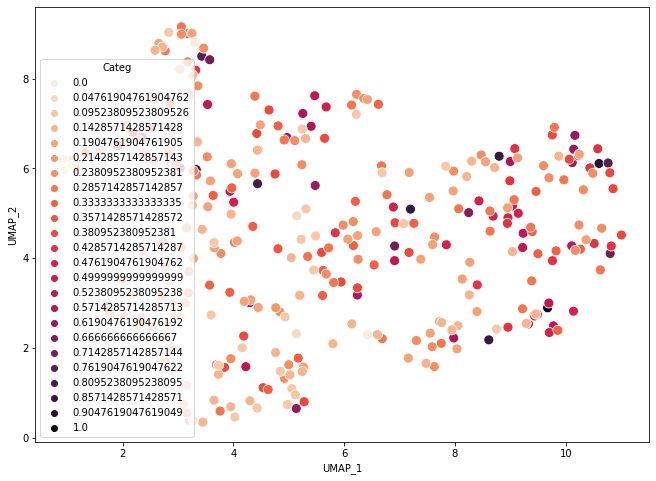

In [29]:
emb['Categ']=df1['Intensity_546.3'] # 546.3, 758.6,  789.6
emb1=emb.sort_values(['Categ'], ascending=False)
#     sns_plot=
plt.figure(figsize=(11,8))
ax=sns.scatterplot(x=emb1['UMAP_1'],y=emb1['UMAP_2'],
                   hue=emb1['Categ'],#.iloc[:,34],
                   legend="full",
#                    style=allData.iloc[:,0],
                   palette="rocket_r",
                   s=100)


In [30]:
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

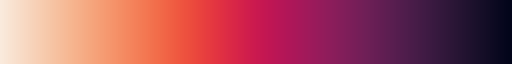

In [25]:
plot_map=sns.color_palette("rocket_r", as_cmap=True)
plot_map

In [27]:
plot_map.figure.savefig("colorbar.svg", dpi=300)

AttributeError: 'ListedColormap' object has no attribute 'figure'

In [3]:
emb_out=emb
emb_out['Cluster']=pred_y
emb_out

UMAP_1    UMAP_2 Categ  Cluster
0    4.292561  3.008467   Low        2
1    5.719315  4.229525   Low        0
2    6.218399  7.204297   Low        1
3    1.142579  6.022885   Low        1
4    9.697316  5.789519   Low        0
..        ...       ...   ...      ...
316  3.537107  5.146131   Low        1
317  4.433021  6.404528   Low        1
318  3.533777  7.422277  High        1
319  5.303248  6.666559   Low        1
320  0.930111  6.210955   Low        1

[321 rows x 4 columns]

In [4]:
emb.to_csv("embedding_cluster.csv")

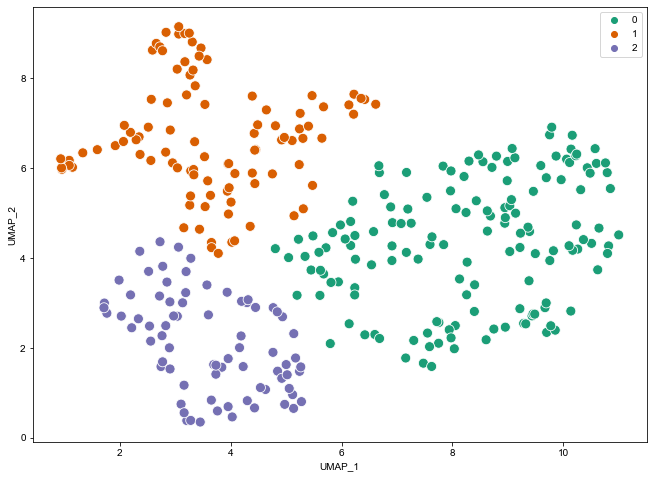

In [14]:
sns_plt.figure

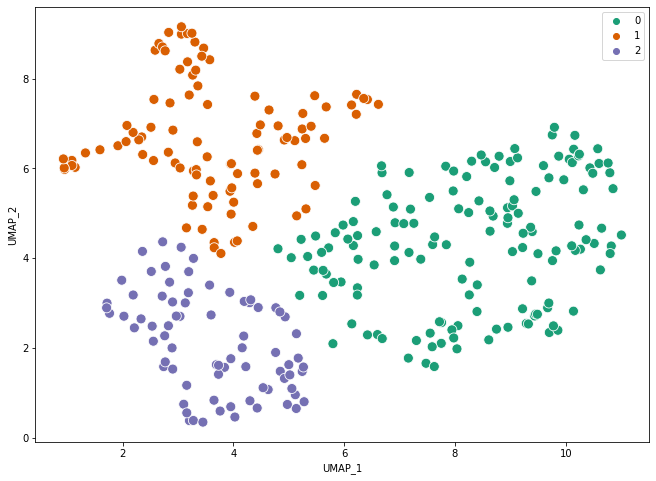

In [6]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import DBSCAN
# from sklearn.mixture import GaussianMixture

# kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y=kmeans.fit_predict(emb[['UMAP_1','UMAP_2']])
# plt.figure(figsize=(11,8))
# sns_plt = sns.scatterplot(x=emb['UMAP_1'], y=emb['UMAP_2'],hue=pred_y,palette="Dark2",s=100)

model = AgglomerativeClustering(n_clusters=3)
pred_y = model.fit_predict(emb[['UMAP_1','UMAP_2']])
plt.figure(figsize=(11,8))
sns_plt = sns.scatterplot(x=emb['UMAP_1'], y=emb['UMAP_2'],hue=pred_y,palette="Dark2",s=100)
# sns_plt.figure.savefig("umap_agglomerative.svg",dpi=300)

# model = DBSCAN(eps=0.5, min_samples=3)
# pred_y = model.fit_predict(emb[['UMAP_1','UMAP_2']])
# plt.figure(figsize=(11,8))
# sns_plt = sns.scatterplot(x=emb['UMAP_1'], y=emb['UMAP_2'],hue=pred_y,palette="Dark2",s=100)

# model = GaussianMixture(n_components=3)
# pred_y = model.fit_predict(emb[['UMAP_1','UMAP_2']])
# plt.figure(figsize=(11,8))
# sns_plt = sns.scatterplot(x=emb['UMAP_1'], y=emb['UMAP_2'],hue=pred_y,palette="Dark2",s=100)


In [15]:
sns_plt.figure.savefig("umap_agglomerative.svg",dpi=300)

In [87]:

df1_norm_extended.groupby(['Clusters']).value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [83]:
df1_norm['Clusters']=pred_y
df1_norm_extended['Clusters']=pred_y

In [98]:
df1_norm.columns

Index(['Area', 'Compactness', 'Eccentricity', 'EquivalentDiameter', 'Extent',
       'FormFactor', 'MajorAxisLength', 'MaxFeretDiameter', 'MaximumRadius',
       'MeanRadius', 'MedianRadius', 'MinFeretDiameter', 'MinorAxisLength',
       'Perimeter', 'Solidity', 'Intensity_phase', 'Granularity_1',
       'Granularity_3', 'Correlation_00', 'Correlation_01', 'Intensity_504.3',
       'Intensity_524.3', 'Intensity_542.5', 'Intensity_546.3',
       'Intensity_666.5', 'Intensity_688.4', 'Intensity_703.6',
       'Intensity_725.6', 'Intensity_725.7', 'Intensity_732.6',
       'Intensity_749.5', 'Intensity_754.5', 'Intensity_754.6',
       'Intensity_755.5', 'Intensity_758.6', 'Intensity_760.6',
       'Intensity_762.6', 'Intensity_780.5', 'Intensity_780.6',
       'Intensity_781.6', 'Intensity_782.5', 'Intensity_787.6',
       'Intensity_789.6', 'Intensity_798.5', 'Intensity_798.6',
       'Intensity_804.6', 'Intensity_806.6', 'Intensity_808.6',
       'Intensity_810.7', 'Intensity_826.6', '

In [6]:
df1_norm.to_csv("old.csv")

## Boxplots

In [17]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


In [18]:
df1_norm

Area  Compactness  Eccentricity  EquivalentDiameter    Extent  \
0    0.078133     0.066933      0.976888            0.113082  0.733762   
1    0.304306     0.090377      0.978028            0.386970  0.385390   
2    0.349782     0.414634      0.986040            0.435447  0.135226   
3    0.129898     0.226610      0.986199            0.181713  0.618062   
4    0.776730     0.289510      0.994943            0.826662  0.511877   
..        ...          ...           ...                 ...       ...   
316  0.110063     0.121591      0.983316            0.155925  0.248505   
317  0.248186     0.185642      0.992994            0.324579  0.139237   
318  0.159894     0.311999      0.992150            0.219615  0.263069   
319  0.550073     0.195543      0.993867            0.631191  0.292795   
320  0.066522     0.153282      0.993559            0.097061  0.651605   

     FormFactor  MajorAxisLength  MaxFeretDiameter  MaximumRadius  MeanRadius  \
0      0.362662         0.118031          0.157848       0.248003    0.311550   
1      0.291198         0.193390          0.223988       0.434727    0.423783   
2      0.054487         0.439979          0.520703       0.241581    0.203974   
3      0.122275         0.189058          0.241782       0.203167    0.167428   
4      0.091053         0.482199          0.630751       0.347057    0.318480   
..          ...              ...               ...            ...         ...   
316    0.227732         0.168338          0.219992       0.258498    0.245253   
317    0.151867         0.250771          0.347132       0.272784    0.252686   
318    0.082578         0.299415          0.325642       0.239418    0.161574   
319    0.143782         0.340835          0.410027       0.290516    0.314356   
320    0.183993         0.203905          0.214109       0.183693    0.172738   

     ...  Intensity_798.6  Intensity_804.6  Intensity_806.6  Intensity_808.6  \
0    ...         0.091837         0.162162         0.191489            0.128   
1    ...         0.122449         0.162162         0.148936            0.168   
2    ...         0.051020         0.108108         0.063830            0.064   
3    ...         0.071429         0.135135         0.085106            0.096   
4    ...         0.030612         0.027027         0.042553            0.056   
..   ...              ...              ...              ...              ...   
316  ...         0.173469         0.162162         0.148936            0.080   
317  ...         0.295918         0.216216         0.127660            0.184   
318  ...         0.775510         0.891892         1.000000            0.780   
319  ...         0.010204         0.054054         0.021277            0.016   
320  ...         0.040816         0.054054         0.021277            0.032   

     Intensity_810.7  Intensity_826.6  Intensity_832.6  Intensity_833.6  \
0           0.152542         0.148148         0.175439         0.181818   
1           0.158192         0.148148         0.192982         0.212121   
2           0.056497         0.074074         0.070175         0.090909   
3           0.101695         0.111111         0.087719         0.121212   
4           0.045198         0.074074         0.087719         0.090909   
..               ...              ...              ...              ...   
316         0.112994         0.148148         0.070175         0.212121   
317         0.194915         0.407407         0.263158         0.303030   
318         0.435028         0.851852         0.842105         1.000000   
319         0.005650         0.074074         0.052632         0.060606   
320         0.028249         0.074074         0.035088         0.030303   

     Intensity_834.6  Clusters  
0           0.173913         2  
1           0.173913         0  
2           0.130435         1  
3           0.173913         1  
4           0.086957         0  
..               ...       ...  
316         0.217391         1  
317         0.347826 

/Users/rtaujale/opt/anaconda3/envs/prn/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


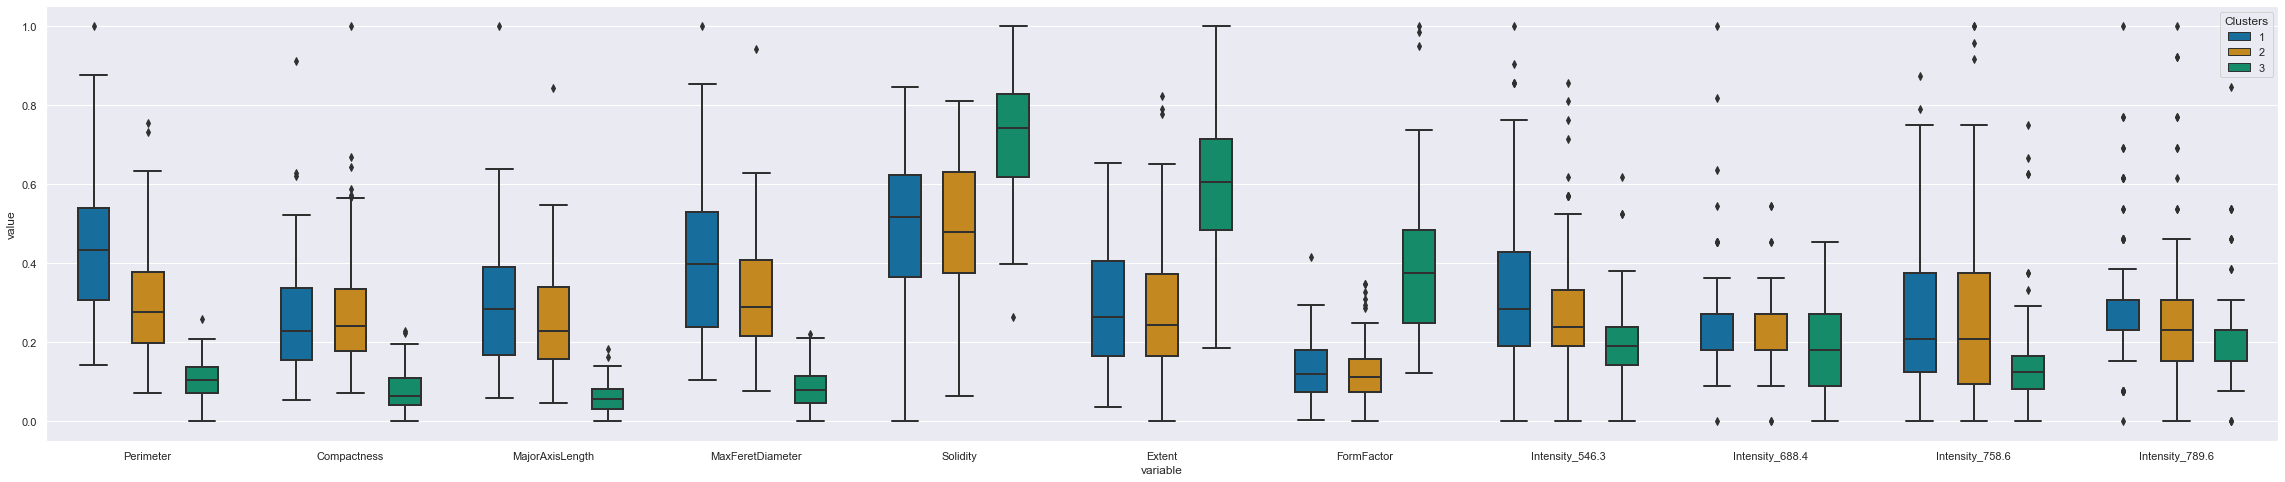

In [28]:
df1_box=df1_norm[['Perimeter', 'Compactness', 'MajorAxisLength', 'MaxFeretDiameter', 'Solidity', 'Extent', 'FormFactor', 'Intensity_546.3','Intensity_688.4','Intensity_758.6','Intensity_789.6', 'Clusters']]
# df1_box['id']=df1_box.index
df1_box2=pd.melt(df1_box, id_vars=['Clusters'], value_vars=['Perimeter', 'Compactness', 'MajorAxisLength', 'MaxFeretDiameter', 'Solidity', 'Extent', 'FormFactor', 'Intensity_546.3','Intensity_688.4','Intensity_758.6','Intensity_789.6'])
renamed_clusters = {0:1,1:2,2:3}
# renamed_clusters = {0:2,1:1,2:3}
df1_box2['Clusters'] = df1_box2['Clusters'].map(renamed_clusters)

fig = plt.figure(figsize=(40,8))
sns.set(style="darkgrid")
ax = sns.boxplot(y='value', x='variable', 
            data=df1_box2, 
            palette="colorblind",
            hue='Clusters',
            linewidth=2,
            width=0.8)

adjust_box_widths(fig, 0.6)

In [29]:
fig.savefig("boxplot1.svg",dpi=300)

/Users/rtaujale/opt/anaconda3/envs/prn/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


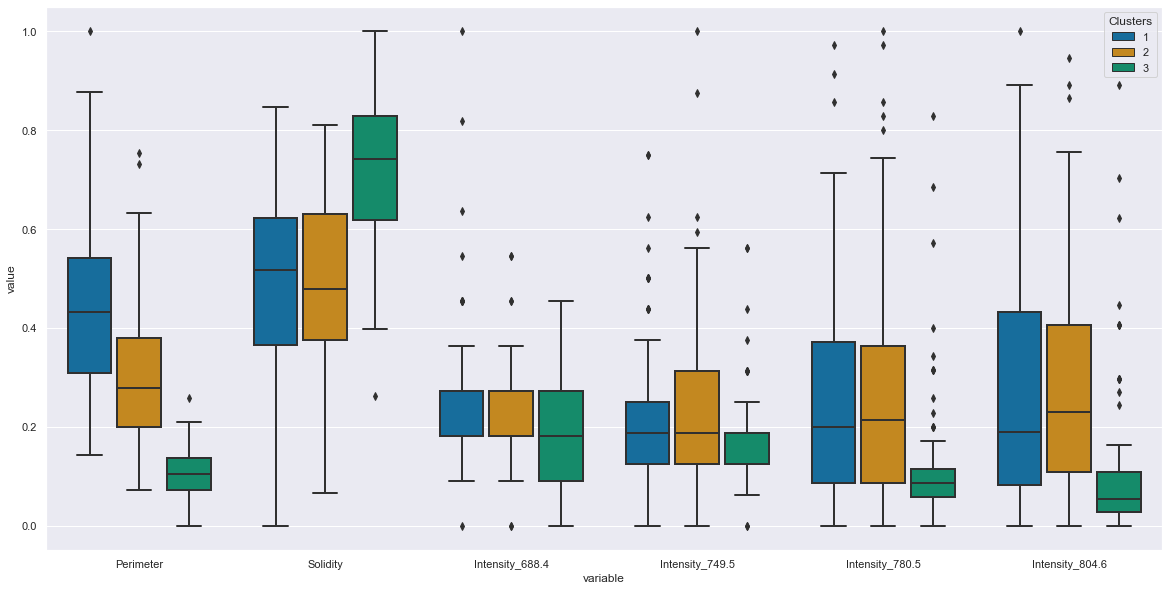

In [23]:
df1_box=df1_norm[['Perimeter', 'Solidity','Intensity_688.4','Intensity_749.5','Intensity_780.5','Intensity_804.6','Clusters']]
# df1_box['id']=df1_box.index
df1_box2=pd.melt(df1_box, id_vars=['Clusters'], value_vars=['Perimeter', 'Solidity','Intensity_688.4','Intensity_749.5','Intensity_780.5','Intensity_804.6'])
renamed_clusters = {0:1,1:2,2:3}
# renamed_clusters = {0:1,1:4,2:2,3:3}
df1_box2['Clusters'] = df1_box2['Clusters'].map(renamed_clusters)

fig = plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.boxplot(y='value', x='variable', 
            data=df1_box2, 
            palette="colorblind",
            hue='Clusters',
            linewidth=2,
            width=0.8)

adjust_box_widths(fig, 0.9)

In [24]:
fig.savefig("boxplot2.svg",dpi=300)

In [141]:
df1_box2

Clusters         variable     value
0            2        Perimeter  0.090697
1            0        Perimeter  0.180916
2            3        Perimeter  0.477637
3            0        Perimeter  0.245888
4            1        Perimeter  0.536724
...        ...              ...       ...
1921         0  Intensity_804.6  0.162162
1922         0  Intensity_804.6  0.216216
1923         0  Intensity_804.6  0.891892
1924         0  Intensity_804.6  0.054054
1925         0  Intensity_804.6  0.054054

[1926 rows x 3 columns]

In [ ]:
# Perimeter, Solidity
# 504, 546, 780, 688, 
# 780, 804.6, 688, 749.5 
fig=df1_norm[['Perimeter', 'Solidity','Clusters']].boxplot(by='Clusters',figsize=(15,5))

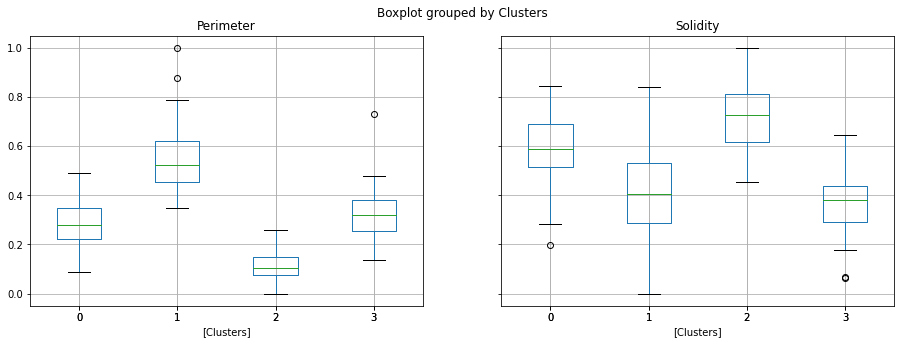

In [102]:
fig=df1_norm[['Perimeter', 'Solidity','Clusters']].boxplot(by='Clusters',figsize=(15,5))

In [105]:
fig[0]

<AxesSubplot:title={'center':'Perimeter'}, xlabel='[Clusters]'>

In [108]:
fig[0].figure.savefig("umap_boxplot_perimeter.svg",dpi=300)
fig[1].figure.savefig("umap_boxplot_solidity.svg",dpi=300)

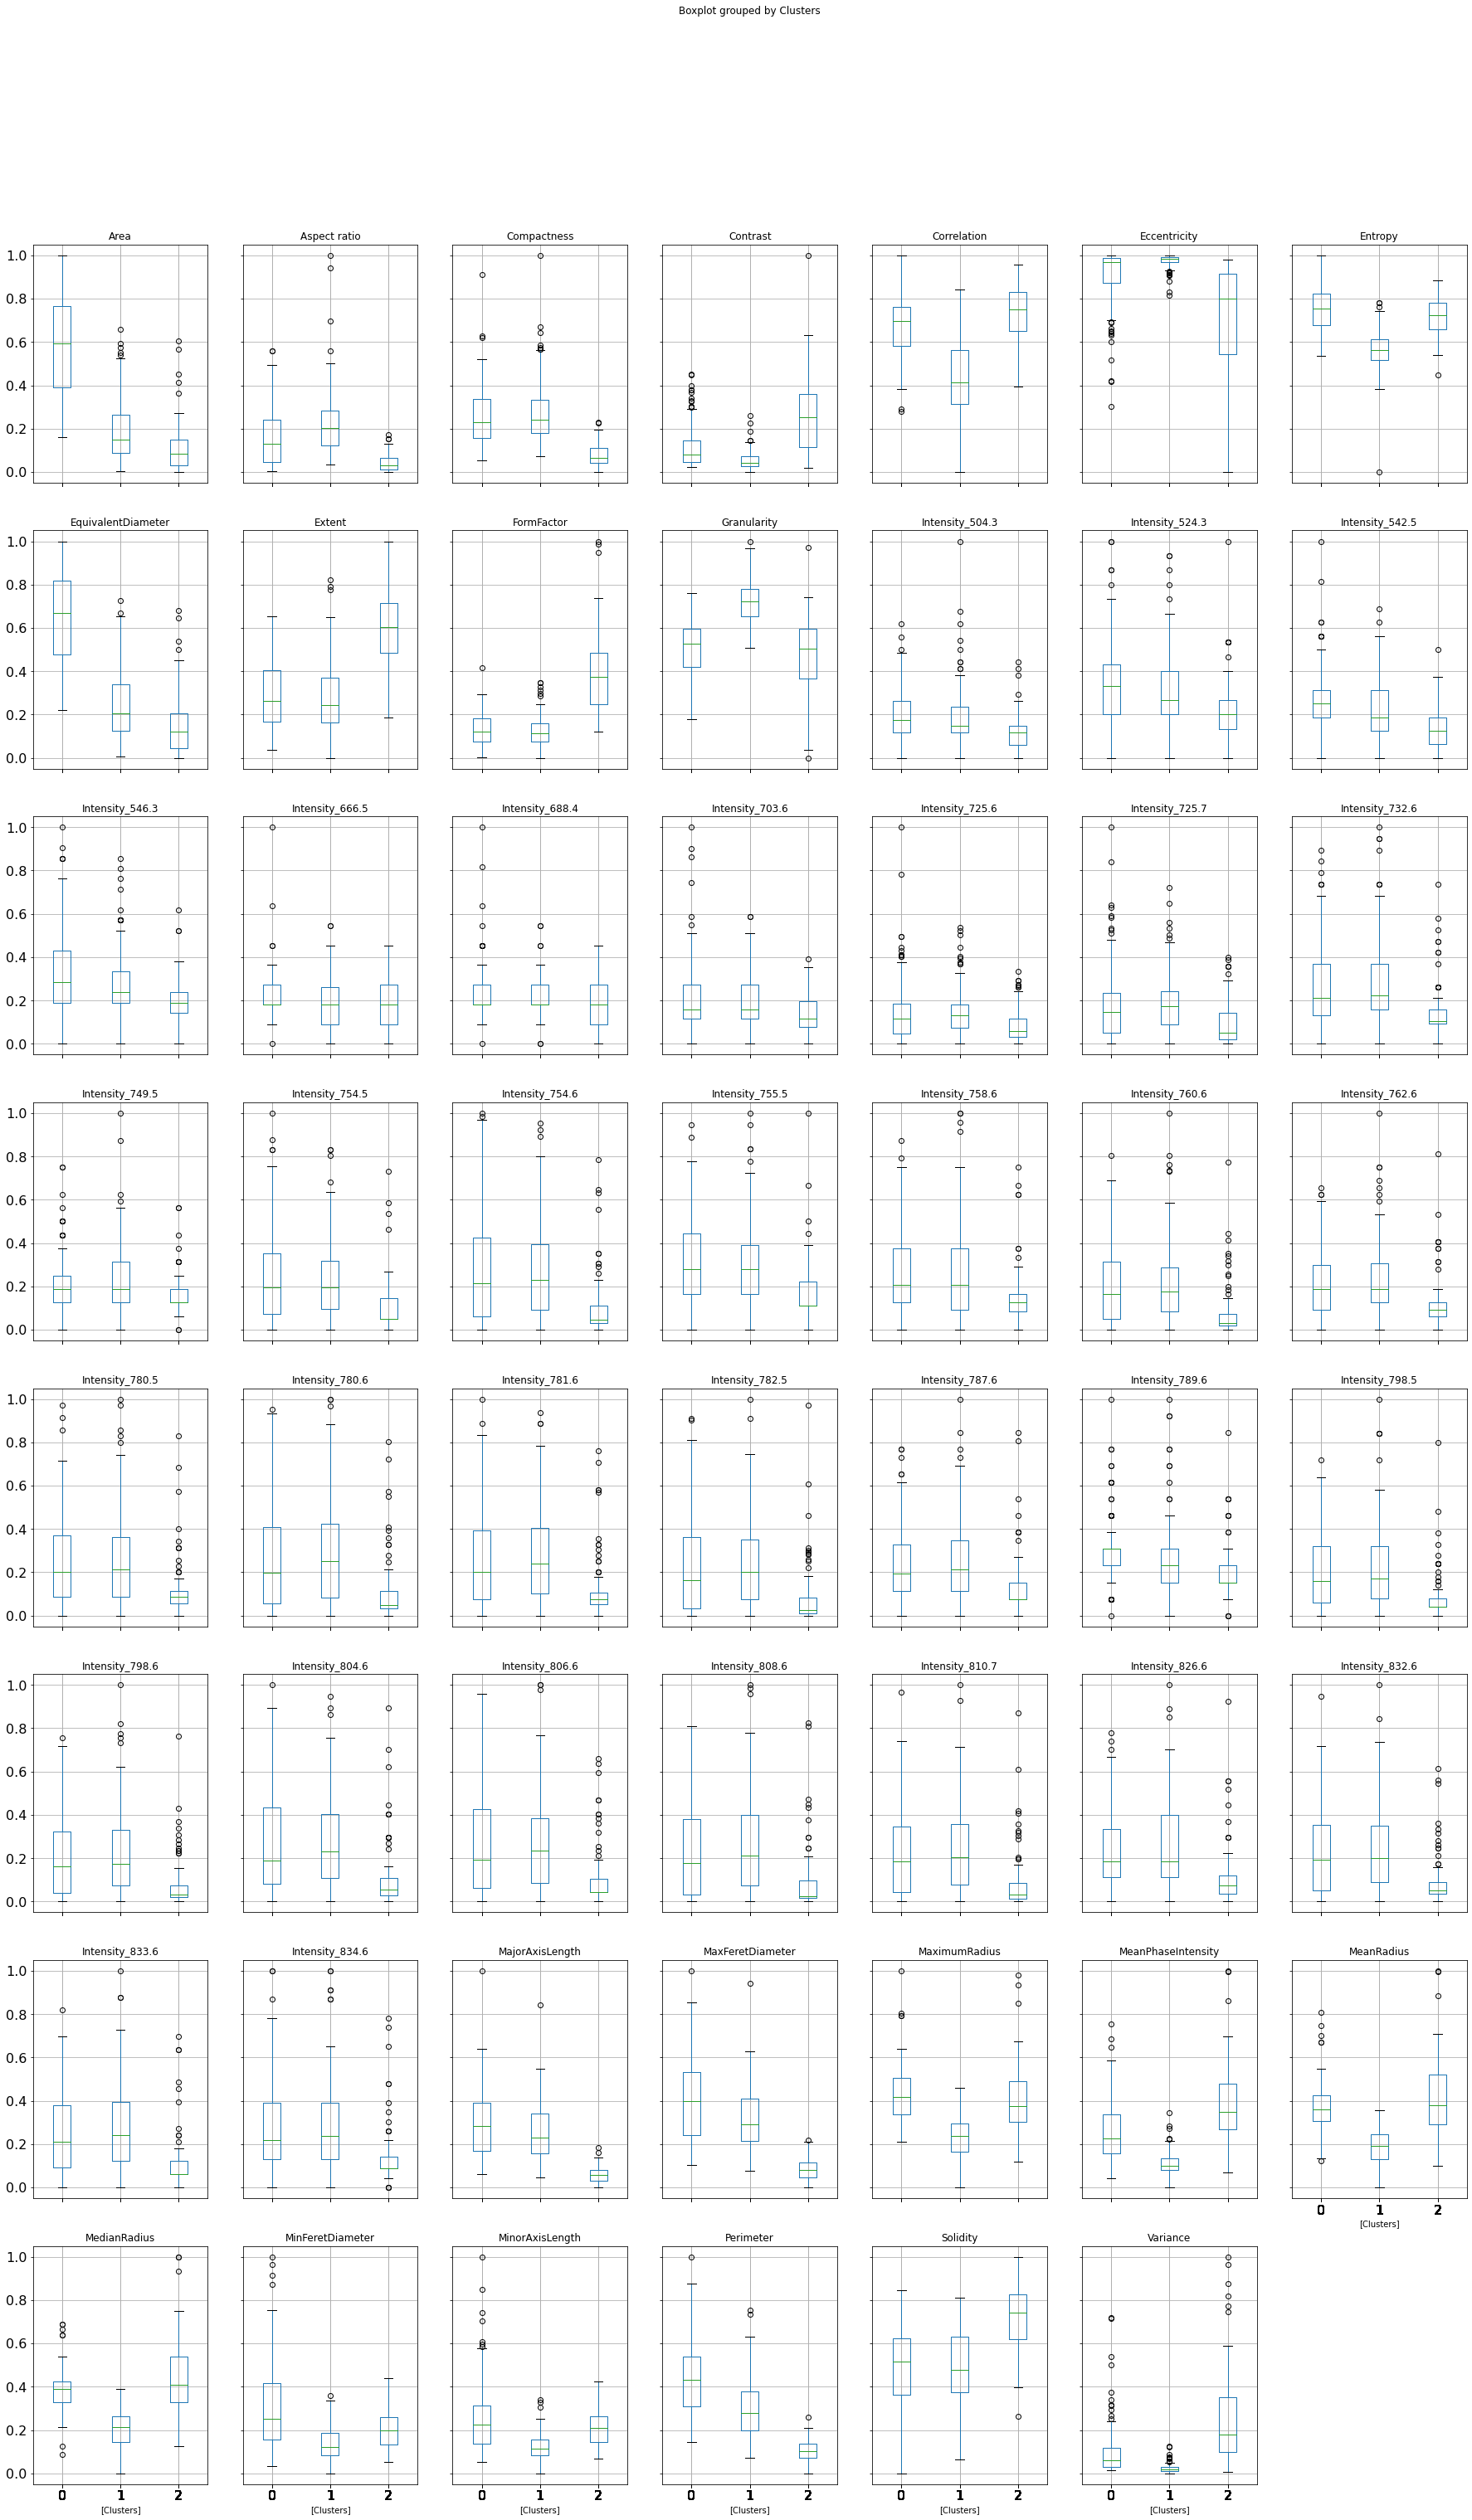

In [16]:
# plt.figure(figsize=(30,50))
df1_norm['Clusters']=pred_y
all_fig = df1_norm.boxplot(by='Clusters',figsize=(30,50), fontsize=16)


In [15]:
all_fig[0][0].get_figure().savefig("all_boxplot.svg", dpi=300)

In [ ]:
# 780, 804.6, 688, 749.5 
fig=df1_norm[['Perimeter', 'Solidity','Clusters']].boxplot(by='Clusters',figsize=(15,5))

In [77]:
! conda install -c conda-forge scikit-posthocs

^C


## ANOVA

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

In [55]:
df1

Categ         Area  Compactness  Eccentricity  EquivalentDiameter  \
0     Low  1582.000000     2.975064      0.983441           44.880563   
1     Low  2517.000000     3.612091      0.984231           56.610458   
2     Low  2705.000000    12.422902      0.989780           58.686565   
3     Low  1796.000000     7.313850      0.989890           47.819852   
4     Low  4470.000000     9.023001      0.995946           75.441240   
..    ...          ...          ...           ...                 ...   
316   Low  2349.933333     5.713147      0.892242           53.445360   
317   Low  2624.533333     7.675046      0.943880           56.638200   
318  High  2701.200000     6.918720      0.943429           57.937592   
319   Low  2637.866667     5.926814      0.883629           56.379239   
320   Low  2857.466667     6.617167      0.880638           59.575789   

       Extent  FormFactor  MajorAxisLength  MaxFeretDiameter  MaximumRadius  \
0    0.553147    0.336127       106.736692        111.400180      10.049876   
1    0.302524    0.276848       146.057098        138.708327      14.422205   
2    0.122553    0.080496       274.721466        261.216385       9.899495   
3    0.469911    0.136727       143.796657        146.054784       9.000000   
4    0.393521    0.110828       296.750505        306.652898      12.369317   
..        ...         ...              ...               ...            ...   
316  0.322513    0.243211       146.987118        150.234990      12.570853   
317  0.228730    0.149966       160.930525        163.697275      12.205820   
318  0.305998    0.167916       179.513638        181.673236      11.965394   
319  0.309475    0.252995       148.314463        157.862432      13.997240   
320  0.281728    0.222113       163.104042        172.468459      14.676064   

     ...  Intensity_798.6  Intensity_804.6  Intensity_806.6  Intensity_808.6  \
0    ...         0.091837         0.162162         0.191489            0.128   
1    ...         0.122449         0.162162         0.148936            0.168   
2    ...         0.051020         0.108108         0.063830            0.064   
3    ...         0.071429         0.135135         0.085106            0.096   
4    ...         0.030612         0.027027         0.042553            0.056   
..   ...              ...              ...              ...              ...   
316  ...         0.173469         0.162162         0.148936            0.080   
317  ...         0.295918         0.216216         0.127660            0.184   
318  ...         0.775510         0.891892         1.000000            0.780   
319  ...         0.010204         0.054054         0.021277            0.016   
320  ...         0.040816         0.054054         0.021277            0.032   

     Intensity_810.7  Intensity_826.6  Intensity_832.6  Intensity_833.6  \
0           0.135217         0.127417         0.175439         0.181818   
1           0.140225         0.127417         0.192982         0.212121   
2           0.050081         0.063708         0.070175         0.090909   
3           0.090145         0.095562         0.087719         0.121212   
4           0.040064         0.063708         0.087719         0.090909   
..               ...              ...              ...              ...   
316         0.100161         0.127417         0.070175         0.212121   
317         0.172778         0.350396         0.263158         0.303030   
318         0.385620         0.732646         0.842105         1.000000   
319         0.005008         0.063708         0.052632         0.060606   
320         0.025040         0.063708         0.035088         0.030303   

     Intensity_834.6  Clusters  
0           0.170540         2  
1           0.170540         0  
2           0.127905         1  
3           0.170540         2  
4           0.085270         1  
..               ...       ...  
316         0.213174         0  
317         0.341079         0  
318         0.98060

In [96]:
df1['Clusters']=pred_y
anova_results={}
anova_results['Intensity']=list()
anova_results['P-value']=list()
for i in lipid_cols:
    df_anova=df1[['Clusters',i]]
    df_anova.columns=["Clusters","intensity"]
    model = ols("intensity ~ Clusters", data=df_anova).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results['Intensity'].append(i)
    anova_results['P-value'].append(anova_table["PR(>F)"]["Clusters"])
    print(i,anova_table["PR(>F)"]["Clusters"])
    # perform multiple pairwise comparison (Tukey HSD1
    print(sp.posthoc_ttest(df_anova, val_col='intensity', group_col='Clusters', p_adjust='holm'))
#     m_comp = pairwise_tukeyhsd(endog=df_anova['intensity'], groups=df_anova['Clusters'], alpha=0.05)
#     print(m_comp)

Intensity_504.3 0.0005007655649797623
          2         0         1
2  1.000000  0.002616  0.084404
0  0.002616  1.000000  0.145254
1  0.084404  0.145254  1.000000
Intensity_524.3 0.03076237118909768
          2         0         1
2  1.000000  0.067184  0.074644
0  0.067184  1.000000  0.989517
1  0.074644  0.989517  1.000000
Intensity_542.5 0.0005459644181599183
          2         0         1
2  1.000000  0.001453  0.011170
0  0.001453  1.000000  0.480292
1  0.011170  0.480292  1.000000
Intensity_546.3 0.0007586131022248587
          2         0         1
2  1.000000  0.001712  0.003535
0  0.001712  1.000000  0.685601
1  0.003535  0.685601  1.000000
Intensity_666.5 0.4155809013885171
     2    0    1
2  1.0  1.0  1.0
0  1.0  1.0  1.0
1  1.0  1.0  1.0
Intensity_688.4 0.3133187355282124
     2    0    1
2  1.0  1.0  1.0
0  1.0  1.0  1.0
1  1.0  1.0  1.0
Intensity_703.6 0.012346059487550456
          2         0         1
2  1.000000  0.026845  0.168432
0  0.026845  1.000000  0.480120

In [64]:
pd.DataFrame.from_dict(anova_results).sort_values('P-value')

Intensity   P-value
32  Intensity_834.6  0.000304
0   Intensity_504.3  0.000501
2   Intensity_542.5  0.000546
28  Intensity_810.7  0.000615
16  Intensity_762.6  0.000701
23  Intensity_798.5  0.000714
29  Intensity_826.6  0.000716
3   Intensity_546.3  0.000759
24  Intensity_798.6  0.000818
22  Intensity_789.6  0.000958
14  Intensity_758.6  0.000990
15  Intensity_760.6  0.001023
12  Intensity_754.6  0.001191
13  Intensity_755.5  0.001303
30  Intensity_832.6  0.001362
11  Intensity_754.5  0.001393
27  Intensity_808.6  0.002035
20  Intensity_782.5  0.002278
31  Intensity_833.6  0.003331
18  Intensity_780.6  0.004139
17  Intensity_780.5  0.005252
26  Intensity_806.6  0.005504
25  Intensity_804.6  0.009291
9   Intensity_732.6  0.011839
6   Intensity_703.6  0.012346
19  Intensity_781.6  0.012450
7   Intensity_725.6  0.018890
8   Intensity_725.7  0.020385
10  Intensity_749.5  0.024691
1   Intensity_524.3  0.030762
21  Intensity_787.6  0.036501
5   Intensity_688.4  0.313319
4   Intensity_666.5  0.415581

In [53]:
pd.DataFrame.from_dict(anova_results).sort_values('P-value')

Intensity   P-value
32  Intensity_834.6  0.000304
0   Intensity_504.3  0.000501
2   Intensity_542.5  0.000546
28  Intensity_810.7  0.000615
16  Intensity_762.6  0.000701
23  Intensity_798.5  0.000714
29  Intensity_826.6  0.000716
3   Intensity_546.3  0.000759
24  Intensity_798.6  0.000818
22  Intensity_789.6  0.000958
14  Intensity_758.6  0.000990
15  Intensity_760.6  0.001023
12  Intensity_754.6  0.001191
13  Intensity_755.5  0.001303
30  Intensity_832.6  0.001362
11  Intensity_754.5  0.001393
27  Intensity_808.6  0.002035
20  Intensity_782.5  0.002278
31  Intensity_833.6  0.003331
18  Intensity_780.6  0.004139
17  Intensity_780.5  0.005252
26  Intensity_806.6  0.005504
25  Intensity_804.6  0.009291
9   Intensity_732.6  0.011839
6   Intensity_703.6  0.012346
19  Intensity_781.6  0.012450
7   Intensity_725.6  0.018890
8   Intensity_725.7  0.020385
10  Intensity_749.5  0.024691
1   Intensity_524.3  0.030762
21  Intensity_787.6  0.036501
5   Intensity_688.4  0.313319
4   Intensity_666.5  0.415581

In [49]:
def anova(group: pd.DataFrame):
    # We know that every column in `group` is a continuous variable. The
    # categorical variables have been moved to the index
    result = {
        ("pvalue", col): f_oneway(
            *[group.loc[(slice(None), cat), col].dropna() for cat in cat1]
        ).pvalue
        for col in group.columns
    }
    return pd.Series(result)


pvalues = df1_norm.groupby("Clusters").apply(anova)

NameError: name 'cat1' is not defined

In [116]:
df

Groups         Area  Compactness  Eccentricity  EquivalentDiameter  \
0     IFNγ  1582.000000     2.975064      0.983441           44.880563   
1     IFNγ  2517.000000     3.612091      0.984231           56.610458   
2     IFNγ  2705.000000    12.422902      0.989780           58.686565   
3     IFNγ  1796.000000     7.313850      0.989890           47.819852   
4     IFNγ  4470.000000     9.023001      0.995946           75.441240   
..     ...          ...          ...           ...                 ...   
316   IFNγ  2349.933333     5.713147      0.892242           53.445360   
317   IFNγ  2624.533333     7.675046      0.943880           56.638200   
318   IFNγ  2701.200000     6.918720      0.943429           57.937592   
319   IFNγ  2637.866667     5.926814      0.883629           56.379239   
320   IFNγ  2857.466667     6.617167      0.880638           59.575789   

       Extent  FormFactor  MajorAxisLength  MaxFeretDiameter  MaximumRadius  \
0    0.553147    0.336127       106.736692        111.400180      10.049876   
1    0.302524    0.276848       146.057098        138.708327      14.422205   
2    0.122553    0.080496       274.721466        261.216385       9.899495   
3    0.469911    0.136727       143.796657        146.054784       9.000000   
4    0.393521    0.110828       296.750505        306.652898      12.369317   
..        ...         ...              ...               ...            ...   
316  0.322513    0.243211       146.987118        150.234990      12.570853   
317  0.228730    0.149966       160.930525        163.697275      12.205820   
318  0.305998    0.167916       179.513638        181.673236      11.965394   
319  0.309475    0.252995       148.314463        157.862432      13.997240   
320  0.281728    0.222113       163.104042        172.468459      14.676064   

     ...  Intensity_798.5  Intensity_798.6  Intensity_804.6  Intensity_806.6  \
0    ...             0.06         0.091837         0.162162         0.191489   
1    ...             0.16         0.122449         0.162162         0.148936   
2    ...             0.06         0.051020         0.108108         0.063830   
3    ...             0.08         0.071429         0.135135         0.085106   
4    ...             0.04         0.030612         0.027027         0.042553   
..   ...              ...              ...              ...              ...   
316  ...             0.18         0.173469         0.162162         0.148936   
317  ...             0.38         0.295918         0.216216         0.127660   
318  ...             0.84         0.775510         0.891892         1.000000   
319  ...             0.02         0.010204         0.054054         0.021277   
320  ...             0.08         0.040816         0.054054         0.021277   

     Intensity_808.6  Intensity_810.7  Intensity_826.6  Intensity_832.6  \
0              0.128         0.135217         0.127417         0.175439   
1              0.168         0.140225         0.127417         0.192982   
2              0.064         0.050081         0.063708         0.070175   
3              0.096         0.090145         0.095562         0.087719   
4              0.056         0.040064         0.063708         0.087719   
..               ...              ...              ...              ...   
316            0.080         0.100161         0.127417         0.070175   
317            0.184         0.172778         0.350396         0.263158   
318            0.780         0.385620         0.732646         0.842105   
319            0.016         0.005008         0.063708         0.052632   
320            0.032         0.025040         0.063708         0.035088   

     Intensity_833.6  Intensity_834.6  
0           0.181818         0.170540  
1           0.212121         0.170540  
2           0.090909         0.127905  
3           0.121212         0.170540  
4           0.090909         0.085270  
..               ...              ...  
316         0.212121    

In [125]:
dfmat=df.copy()
dfmat.drop(['Groups'], axis=1)
# dfmat=dfmat.reset_index(drop=True) # For IFN
# dfmat

Area  Compactness  Eccentricity  EquivalentDiameter    Extent  \
0    1582.000000     2.975064      0.983441           44.880563  0.553147   
1    2517.000000     3.612091      0.984231           56.610458  0.302524   
2    2705.000000    12.422902      0.989780           58.686565  0.122553   
3    1796.000000     7.313850      0.989890           47.819852  0.469911   
4    4470.000000     9.023001      0.995946           75.441240  0.393521   
..           ...          ...           ...                 ...       ...   
316  2349.933333     5.713147      0.892242           53.445360  0.322513   
317  2624.533333     7.675046      0.943880           56.638200  0.228730   
318  2701.200000     6.918720      0.943429           57.937592  0.305998   
319  2637.866667     5.926814      0.883629           56.379239  0.309475   
320  2857.466667     6.617167      0.880638           59.575789  0.281728   

     FormFactor  MajorAxisLength  MaxFeretDiameter  MaximumRadius  MeanRadius  \
0      0.336127       106.736692        111.400180      10.049876    4.243621   
1      0.276848       146.057098        138.708327      14.422205    5.087673   
2      0.080496       274.721466        261.216385       9.899495    3.434593   
3      0.136727       143.796657        146.054784       9.000000    3.159753   
4      0.110828       296.750505        306.652898      12.369317    4.295740   
..          ...              ...               ...            ...         ...   
316    0.243211       146.987118        150.234990      12.570853    4.385497   
317    0.149966       160.930525        163.697275      12.205820    3.942422   
318    0.167916       179.513638        181.673236      11.965394    4.164479   
319    0.252995       148.314463        157.862432      13.997240    4.743974   
320    0.222113       163.104042        172.468459      14.676064    4.823895   

     ...  Intensity_798.5  Intensity_798.6  Intensity_804.6  Intensity_806.6  \
0    ...             0.06         0.091837         0.162162         0.191489   
1    ...             0.16         0.122449         0.162162         0.148936   
2    ...             0.06         0.051020         0.108108         0.063830   
3    ...             0.08         0.071429         0.135135         0.085106   
4    ...             0.04         0.030612         0.027027         0.042553   
..   ...              ...              ...              ...              ...   
316  ...             0.18         0.173469         0.162162         0.148936   
317  ...             0.38         0.295918         0.216216         0.127660   
318  ...             0.84         0.775510         0.891892         1.000000   
319  ...             0.02         0.010204         0.054054         0.021277   
320  ...             0.08         0.040816         0.054054         0.021277   

     Intensity_808.6  Intensity_810.7  Intensity_826.6  Intensity_832.6  \
0              0.128         0.135217         0.127417         0.175439   
1              0.168         0.140225         0.127417         0.192982   
2              0.064         0.050081         0.063708         0.070175   
3              0.096         0.090145         0.095562         0.087719   
4              0.056         0.040064         0.063708         0.087719   
..               ...              ...              ...              ...   
316            0.080         0.100161         0.127417         0.070175   
317            0.184         0.172778         0.350396         0.263158   
318            0.780         0.385620         0.732646         0.842105   
319            0.016         0.005008         0.063708         0.052632   
320            0.032         0.025040         0.063708         0.035088   

     Intensity_833.6  Intensity_834.6  
0           0.181818         0.170540  
1           0.212121         0.170540  
2           0.090909         0.127905  
3           0.121212         0.170540  
4           0.090909         0.085270  
..          

## Correlation

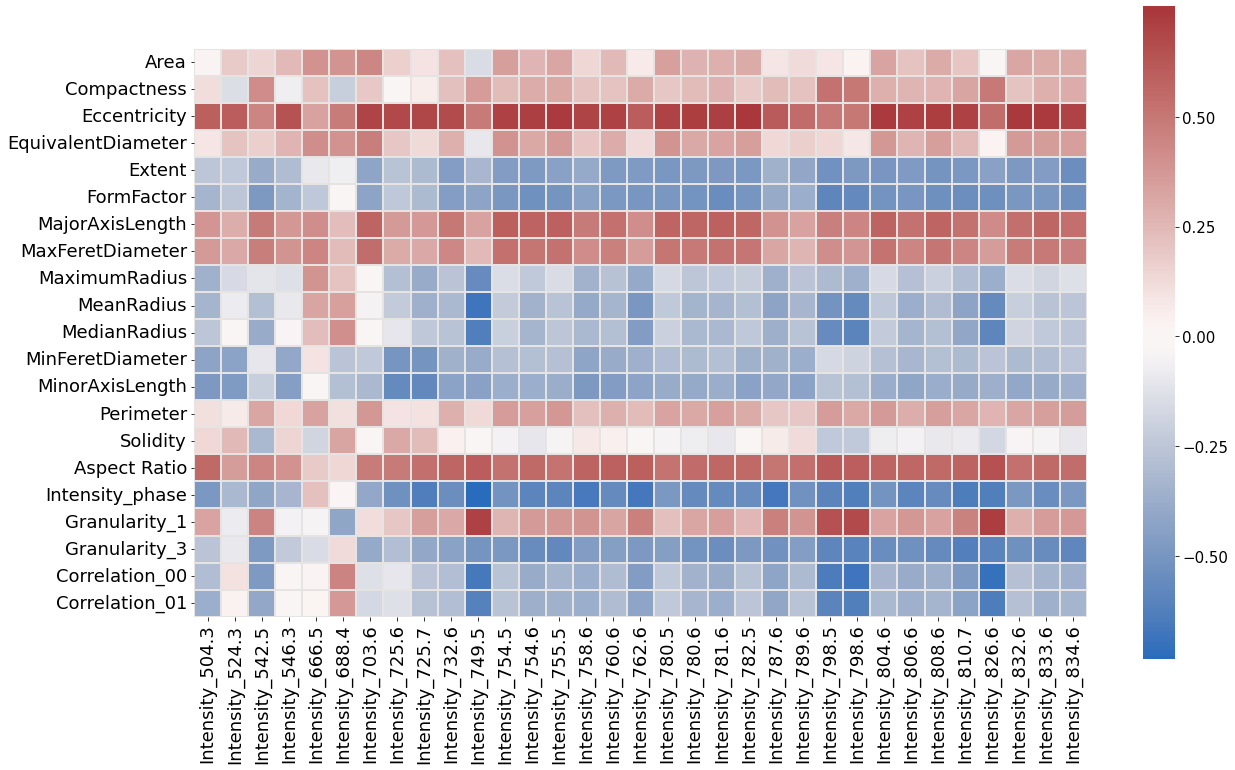

In [127]:
df=pd.read_excel("../Data/ifng_shape_allmzs_comb.xlsx") # For IFN
#df=pd.read_excel("../Data/s1w7_shape_pcvals_comb.xlsx") # For Ctrl
#dfmat=df.drop(['ImageNumber','ObjectNumber', ], axis=1)
# dfmat=df.drop(['Groups', ], axis=1)
dfmat=df.copy()
# dfmat=dfmat.drop(['Groups'], axis=1)
# dfmat=dfRand.reindex(np.random.RandomState(seed=20).permutation(dfRand.index))
dfmat=dfmat.rolling(center=False,window=22,min_periods=1).mean().reset_index(drop=True) # For IFN
#dfmat=dfmat.rolling(center=False,window=10,min_periods=1).mean().reset_index(drop=True) # For Ctrl
correlated_features = set()
correlation_matrix = dfmat.astype(float).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.80: # play around with r
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlation_matrix[np.isnan(correlation_matrix)] = 0
sub_corr=correlation_matrix[['Area','Compactness','Eccentricity','EquivalentDiameter','Extent','FormFactor','MajorAxisLength','MaxFeretDiameter','MaximumRadius','MeanRadius',
            'MedianRadius','MinFeretDiameter','MinorAxisLength','Perimeter','Solidity','Aspect Ratio','Intensity_phase','Granularity_1','Granularity_3','Correlation_00','Correlation_01']][21:]
# sub_corr=correlation_matrix

cmap=sns.color_palette("vlag", as_cmap=True)
# cmap=sns.diverging_palette(340, 20, as_cmap=True)
#cmap=sns.diverging_palette(250, 15, s=75, l=40,n=9, as_cmap=True)
plt.figure(figsize=(20,20))
#Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(sub_corr.T, center=0, xticklabels=True, yticklabels=True,   ##single cell
               linewidths=2,linecolor="#E5E4E2",
#                vmin=-0.55,vmax=0.55,
            square=True, cmap=cmap,cbar=True,cbar_kws={"shrink": .60} )
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_ticks(np.linspace(-0.5, 0.5, 5))
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
#ax=sns.clustermap(correlation_matrix, method="ward", metric="euclidean", cmap="vlag" )  ##bulk cell
plt.show()

In [114]:
ax.figure.savefig("corr1.png")